# Introduction to Data Science and Machine Learning

<p align="center">
    <img width="699" alt="image" src="https://user-images.githubusercontent.com/49638680/159042792-8510fbd1-c4ac-4a48-8320-bc6c1a49cdae.png">
</p>

---

## Feature Engineering Homework
 
Perform feature engineering on a dataset to transform data into a suitable form for a machine learning algorithm.

__Bonus__: Make nice (and _useful_) data visualisation plots.

### The dataset

The [Concrete](https://www.kaggle.com/sinamhd9/concrete-comprehensive-strength) dataset contains a variety of concrete formulations and the resulting product's compressive strength, which is a measure of how much load that kind of concrete can bear. For your information, the task for this dataset is to predict a concrete's compressive strength given its formulation.

In [1]:
# Import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = "retina"

# set font and plot size to be larger
plt.rcParams.update({'font.size': 20, 'figure.figsize': (20, 13)})

### Import data

In [2]:
url_data = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/concrete.csv"

df = pd.read_csv(url_data)
df.head()

cement   slag  ash  water  superplastic  coarseagg  fineagg  age  strength
0   540.0    0.0  0.0  162.0           2.5     1040.0    676.0   28     79.99
1   540.0    0.0  0.0  162.0           2.5     1055.0    676.0   28     61.89
2   332.5  142.5  0.0  228.0           0.0      932.0    594.0  270     40.27
3   332.5  142.5  0.0  228.0           0.0      932.0    594.0  365     41.05
4   198.6  132.4  0.0  192.0           0.0      978.4    825.5  360     44.30

<details>
    <summary><b>Hints and suggestions</b></summary> 
    You can see here the various ingredients going into each variety of concrete. 
    Here some suggestions that you might find useful.
    <ul>
        <li> Adding some additional synthetic features derived from the original ones in the dataset can help a model to learn important relationships among them.</li>
        <li> Try to establish a <b>baseline</b> (_e.g._ a simple stupid model) by training the model on the untouched dataset. This will help you determine whether our new features are actually useful.</li>
    </ul>
    Establishing baselines like this is good practice at the start of the feature engineering process. A baseline score can help you decide whether your new features are worth keeping, or whether you should discard them and possibly try something else.        
</details>


---

## Proposed solution

### Naive Baseline Model

As said, we start by splitting data into train and test and then we create a model with the untouched dataset to be able to compare.

So, we train a KNN regressor over the dataset as it is.

In [3]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values
print(f"The dataset contains {X.shape[0]} rows and {X.shape[1]} columns.")

The dataset contains 1030 rows and 8 columns.


Hence, we split our dataset with ratio $80$/$20$.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Let's fit the model and print the errors.

In [5]:
model = KNeighborsRegressor(n_neighbors=10, metric='manhattan')
model.fit(X_train, y_train);

In [6]:
print(f"The model R-squared is {model.score(X_test, y_test):.2f}")

The model R-squared is 0.67


Let's now, for the sake of completeness, visualise mean squared error and mean absolute error.

In [7]:
print(f"The model mean absolute error: {mean_absolute_error(y_test, model.predict(X_test)):.2f}")

print(f"The model mean squared error: {mean_squared_error(y_test, model.predict(X_test)):.2f}")

The model mean absolute error: 7.27
The model mean squared error: 84.52


What is the significance of such numbers?
In which scales are they measured?

For the answers to these and many other existential questions, read the following!

### First: Let's study the dataset

Until now we have no clue what kind of data we have, if we have floating point numbers, integers (true or representing categories, etc.).
So a preliminary data analysis might be useful.

#### Dataset description

In [8]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [9]:
df.describe(include='all')

cement         slag          ash        water  superplastic  \
count  1030.000000  1030.000000  1030.000000  1030.000000   1030.000000   
mean    281.167864    73.895825    54.188350   181.567282      6.204660   
std     104.506364    86.279342    63.997004    21.354219      5.973841   
min     102.000000     0.000000     0.000000   121.800000      0.000000   
25%     192.375000     0.000000     0.000000   164.900000      0.000000   
50%     272.900000    22.000000     0.000000   185.000000      6.400000   
75%     350.000000   142.950000   118.300000   192.000000     10.200000   
max     540.000000   359.400000   200.100000   247.000000     32.200000   

         coarseagg      fineagg          age     strength  
count  1030.000000  1030.000000  1030.000000  1030.000000  
mean    972.918932   773.580485    45.662136    35.817961  
std      77.753954    80.175980    63.169912    16.705742  
min     801.000000   594.000000     1.000000     2.330000  
25%     932.000000   730.950000     7.000000    23.710000  
50%     968.000000   779.500000    28.000000    34.445000  
75%    1029.400000   824.000000    56.000000    46.135000  
max    1145.000000   992.600000   365.000000    82.600000

In [10]:
df = df.drop_duplicates()
df.describe()

cement         slag          ash        water  superplastic  \
count  1005.000000  1005.000000  1005.000000  1005.000000   1005.000000   
mean    278.631343    72.043483    55.536318   182.075323      6.033234   
std     104.344261    86.170807    64.207969    21.339334      5.919967   
min     102.000000     0.000000     0.000000   121.800000      0.000000   
25%     190.700000     0.000000     0.000000   166.600000      0.000000   
50%     265.000000    20.000000     0.000000   185.700000      6.100000   
75%     349.000000   142.500000   118.300000   192.900000     10.000000   
max     540.000000   359.400000   200.100000   247.000000     32.200000   

         coarseagg      fineagg          age     strength  
count  1005.000000  1005.000000  1005.000000  1005.000000  
mean    974.376816   772.688259    45.856716    35.250378  
std      77.579667    80.340435    63.734692    16.284815  
min     801.000000   594.000000     1.000000     2.330000  
25%     932.000000   724.300000     7.000000    23.520000  
50%     968.000000   780.000000    28.000000    33.800000  
75%    1031.000000   822.200000    56.000000    44.870000  
max    1145.000000   992.600000   365.000000    82.600000

We are lucky! 
No null values. 
Altough, we have some dulicate!

However, note how all the features spans different scales, with very different statistical properties.
Let's go into some detail to explore such difference.

**Note** Here we only have $8$ features, so we can also study each single feature in detail.

#### Scales and correlations

Let's analyse correlations first. We will do that by a `pairplot`.

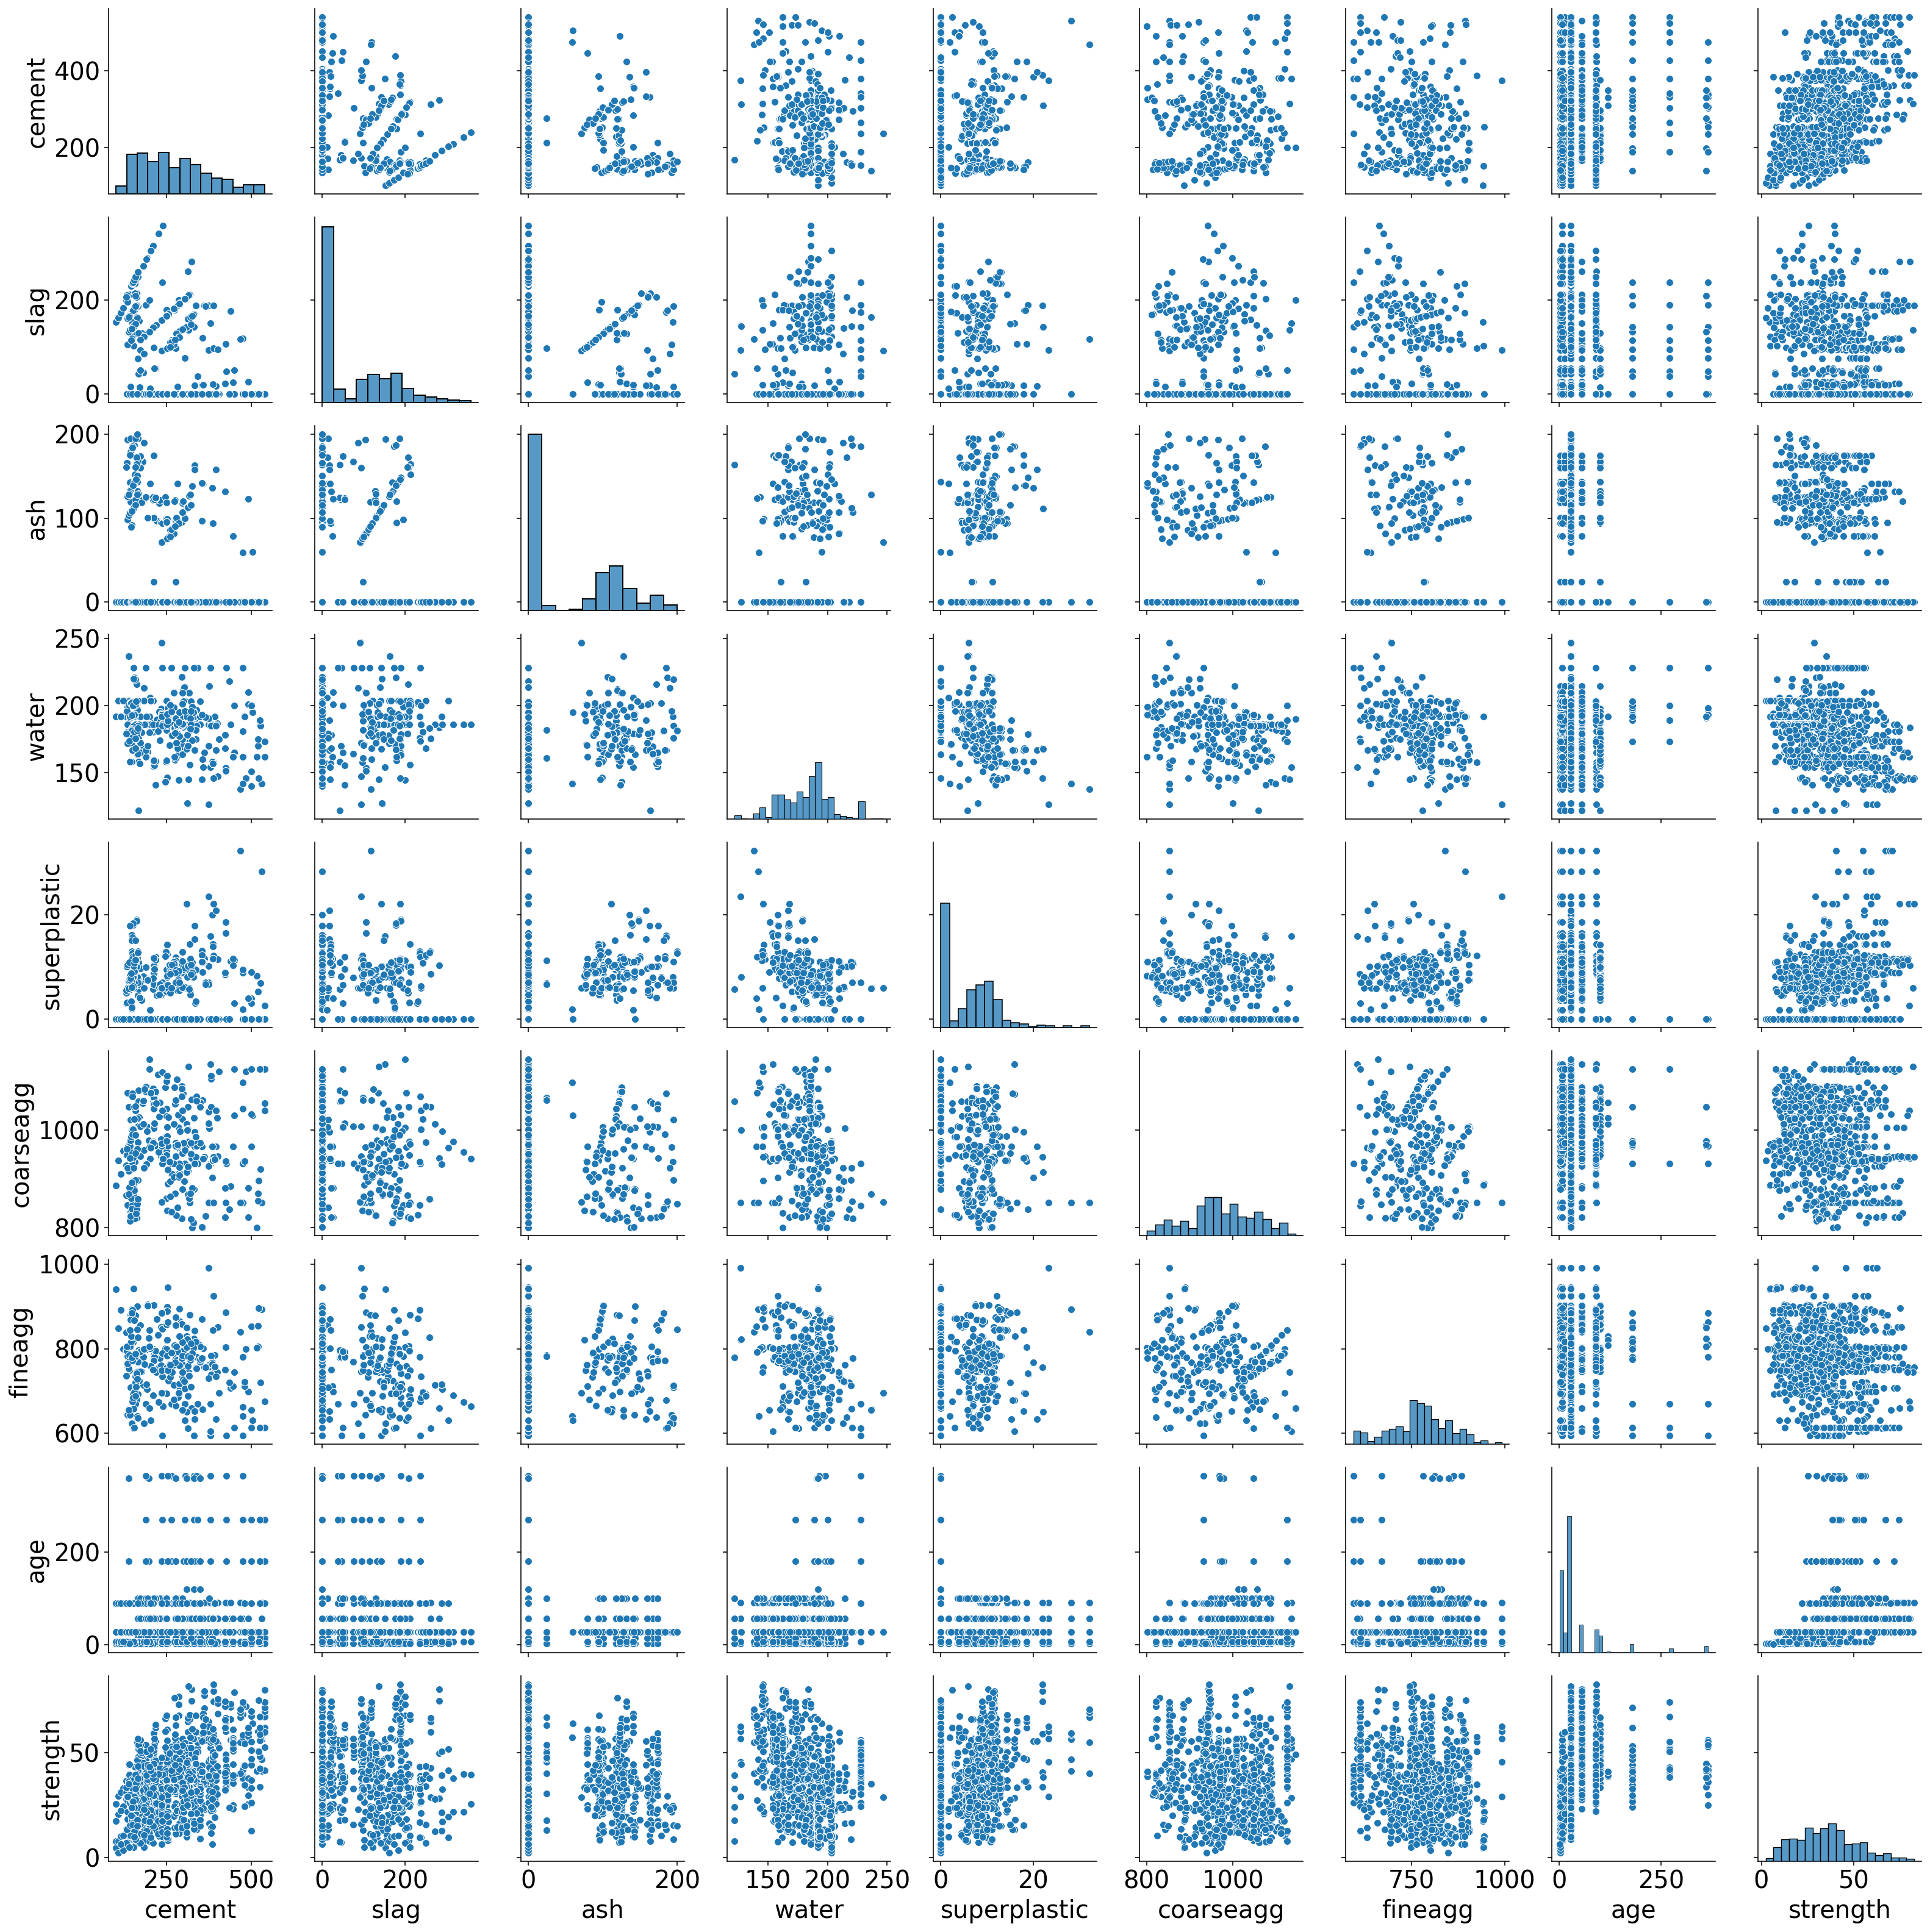

In [11]:
sns.pairplot(data=df);

How can we compare plots on different scales? We cannot.

Let's rescale data. Here we have to choose, which method to use. We are going to use both, keeping two different variable names and compare the results over test sets.

**Naming convention**: For `MinMaxScaler` variables we are going to use the variable convention `_norm`, (_e.g._ `X_norm = MinMaxScaler.transform(X)`) while for `StandardScaler` we are going to use the convention `_stnd`.

In [12]:
normaliser = MinMaxScaler()
standardiser = StandardScaler()

X_train_norm = normaliser.fit_transform(X_train)
X_train_stnd = standardiser.fit_transform(X_train)

X_test_norm = normaliser.transform(X_test)
X_test_stnd = standardiser.transform(X_test)

# Compose dataframes for plot purposes
df_norm = pd.DataFrame(X_train_norm, columns=df.columns[:-1])
df_stnd = pd.DataFrame(X_train_stnd, columns=df.columns[:-1])

We can now plot the pairplot again for both standardised and normalised quantitities.

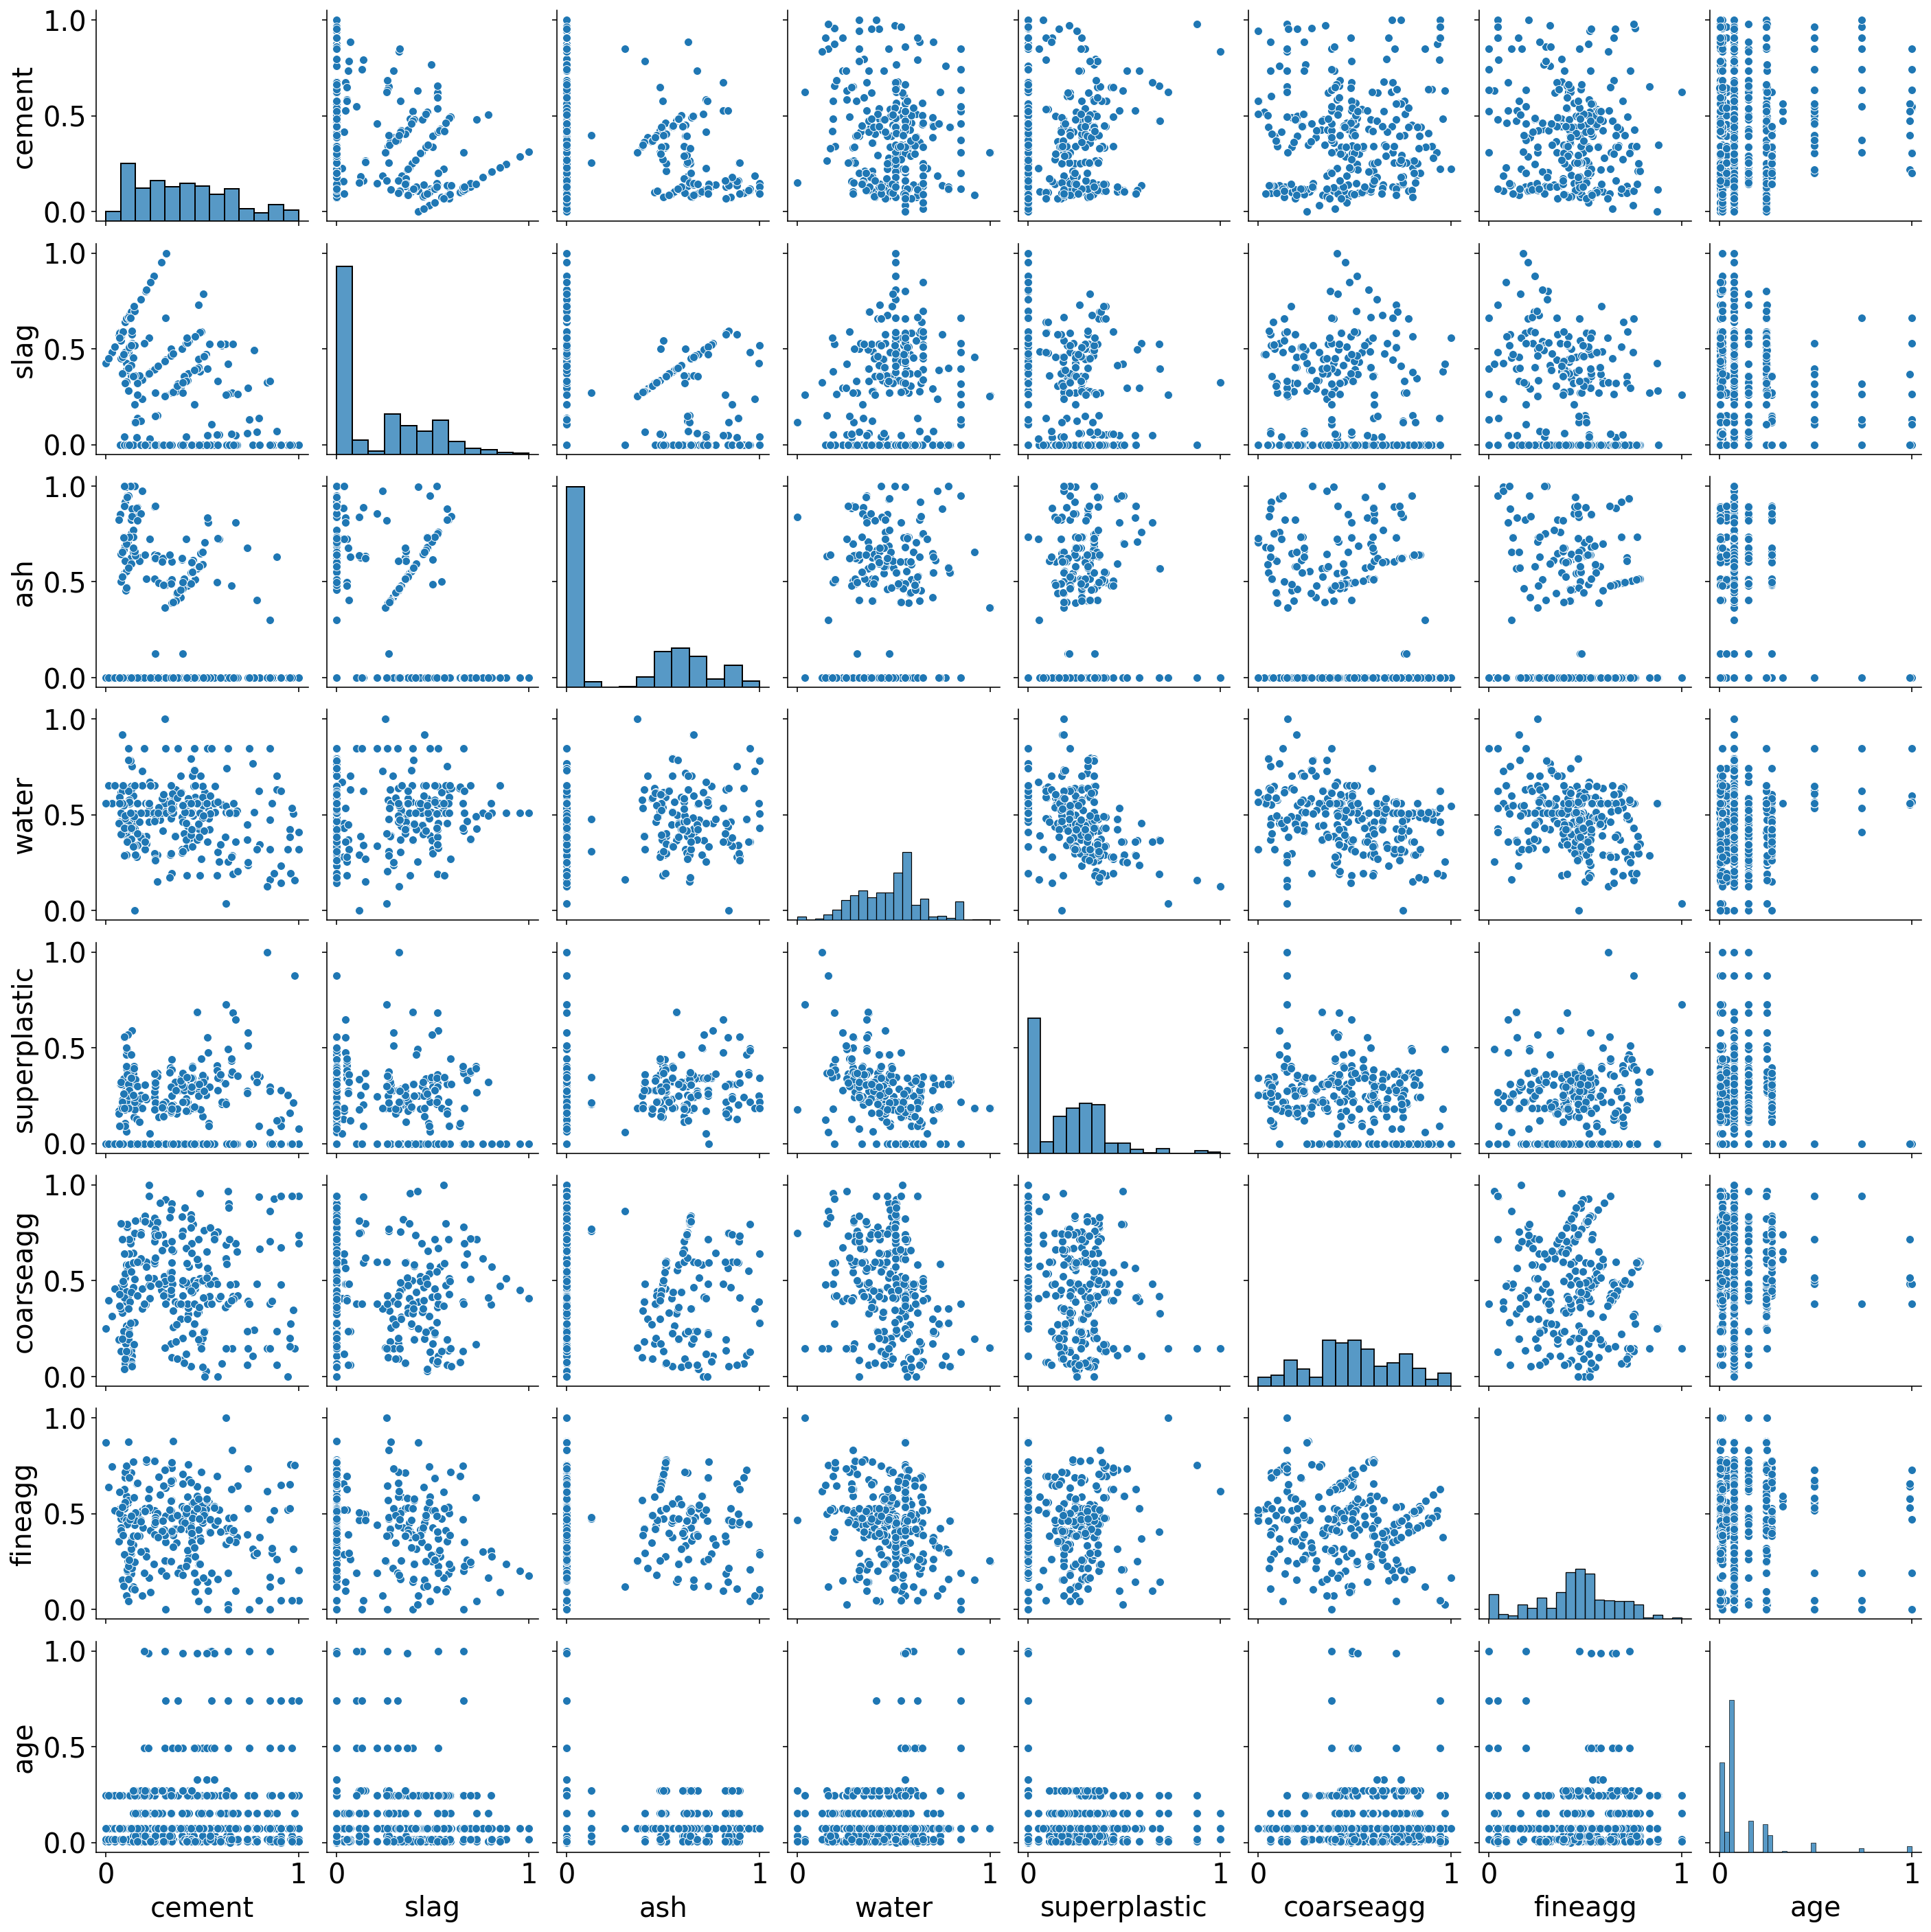

In [13]:
sns.pairplot(data = df_norm);

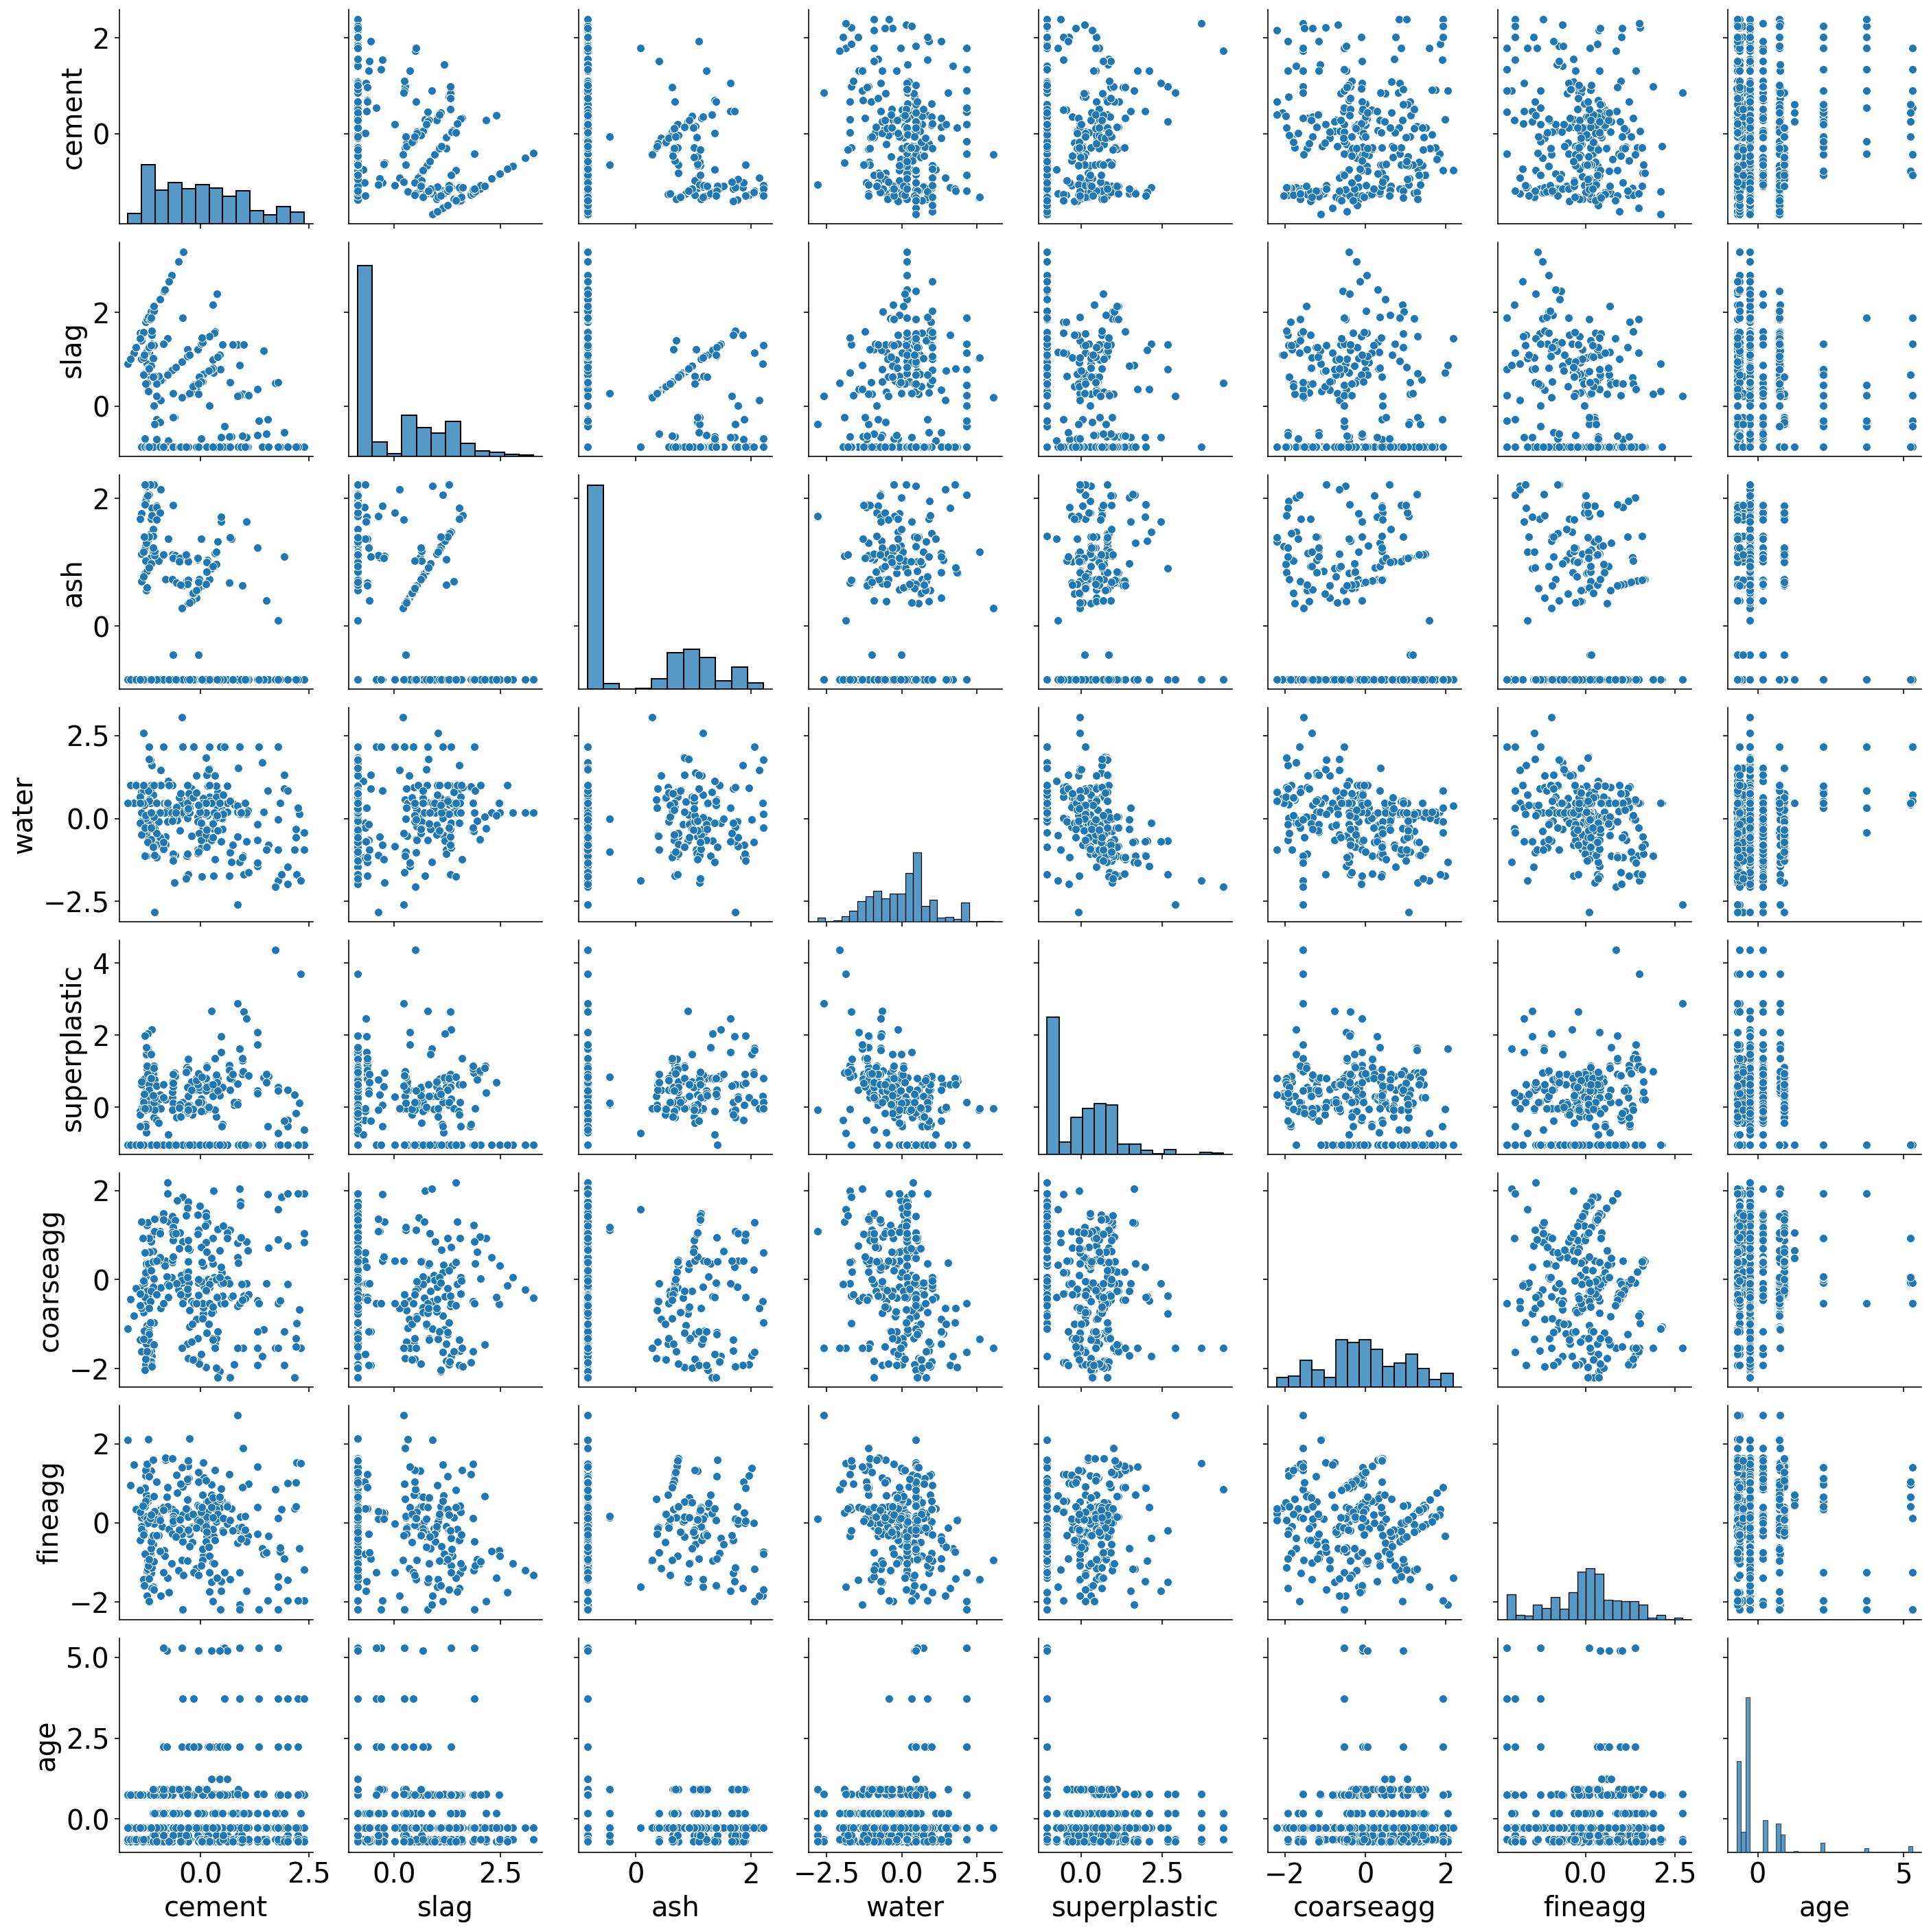

In [14]:
sns.pairplot(data = df_stnd);

#### Distributions and Variances

Let's analyse each feature distribution in order to see if there are features whose variation is small (hence not bringing a lot of information).

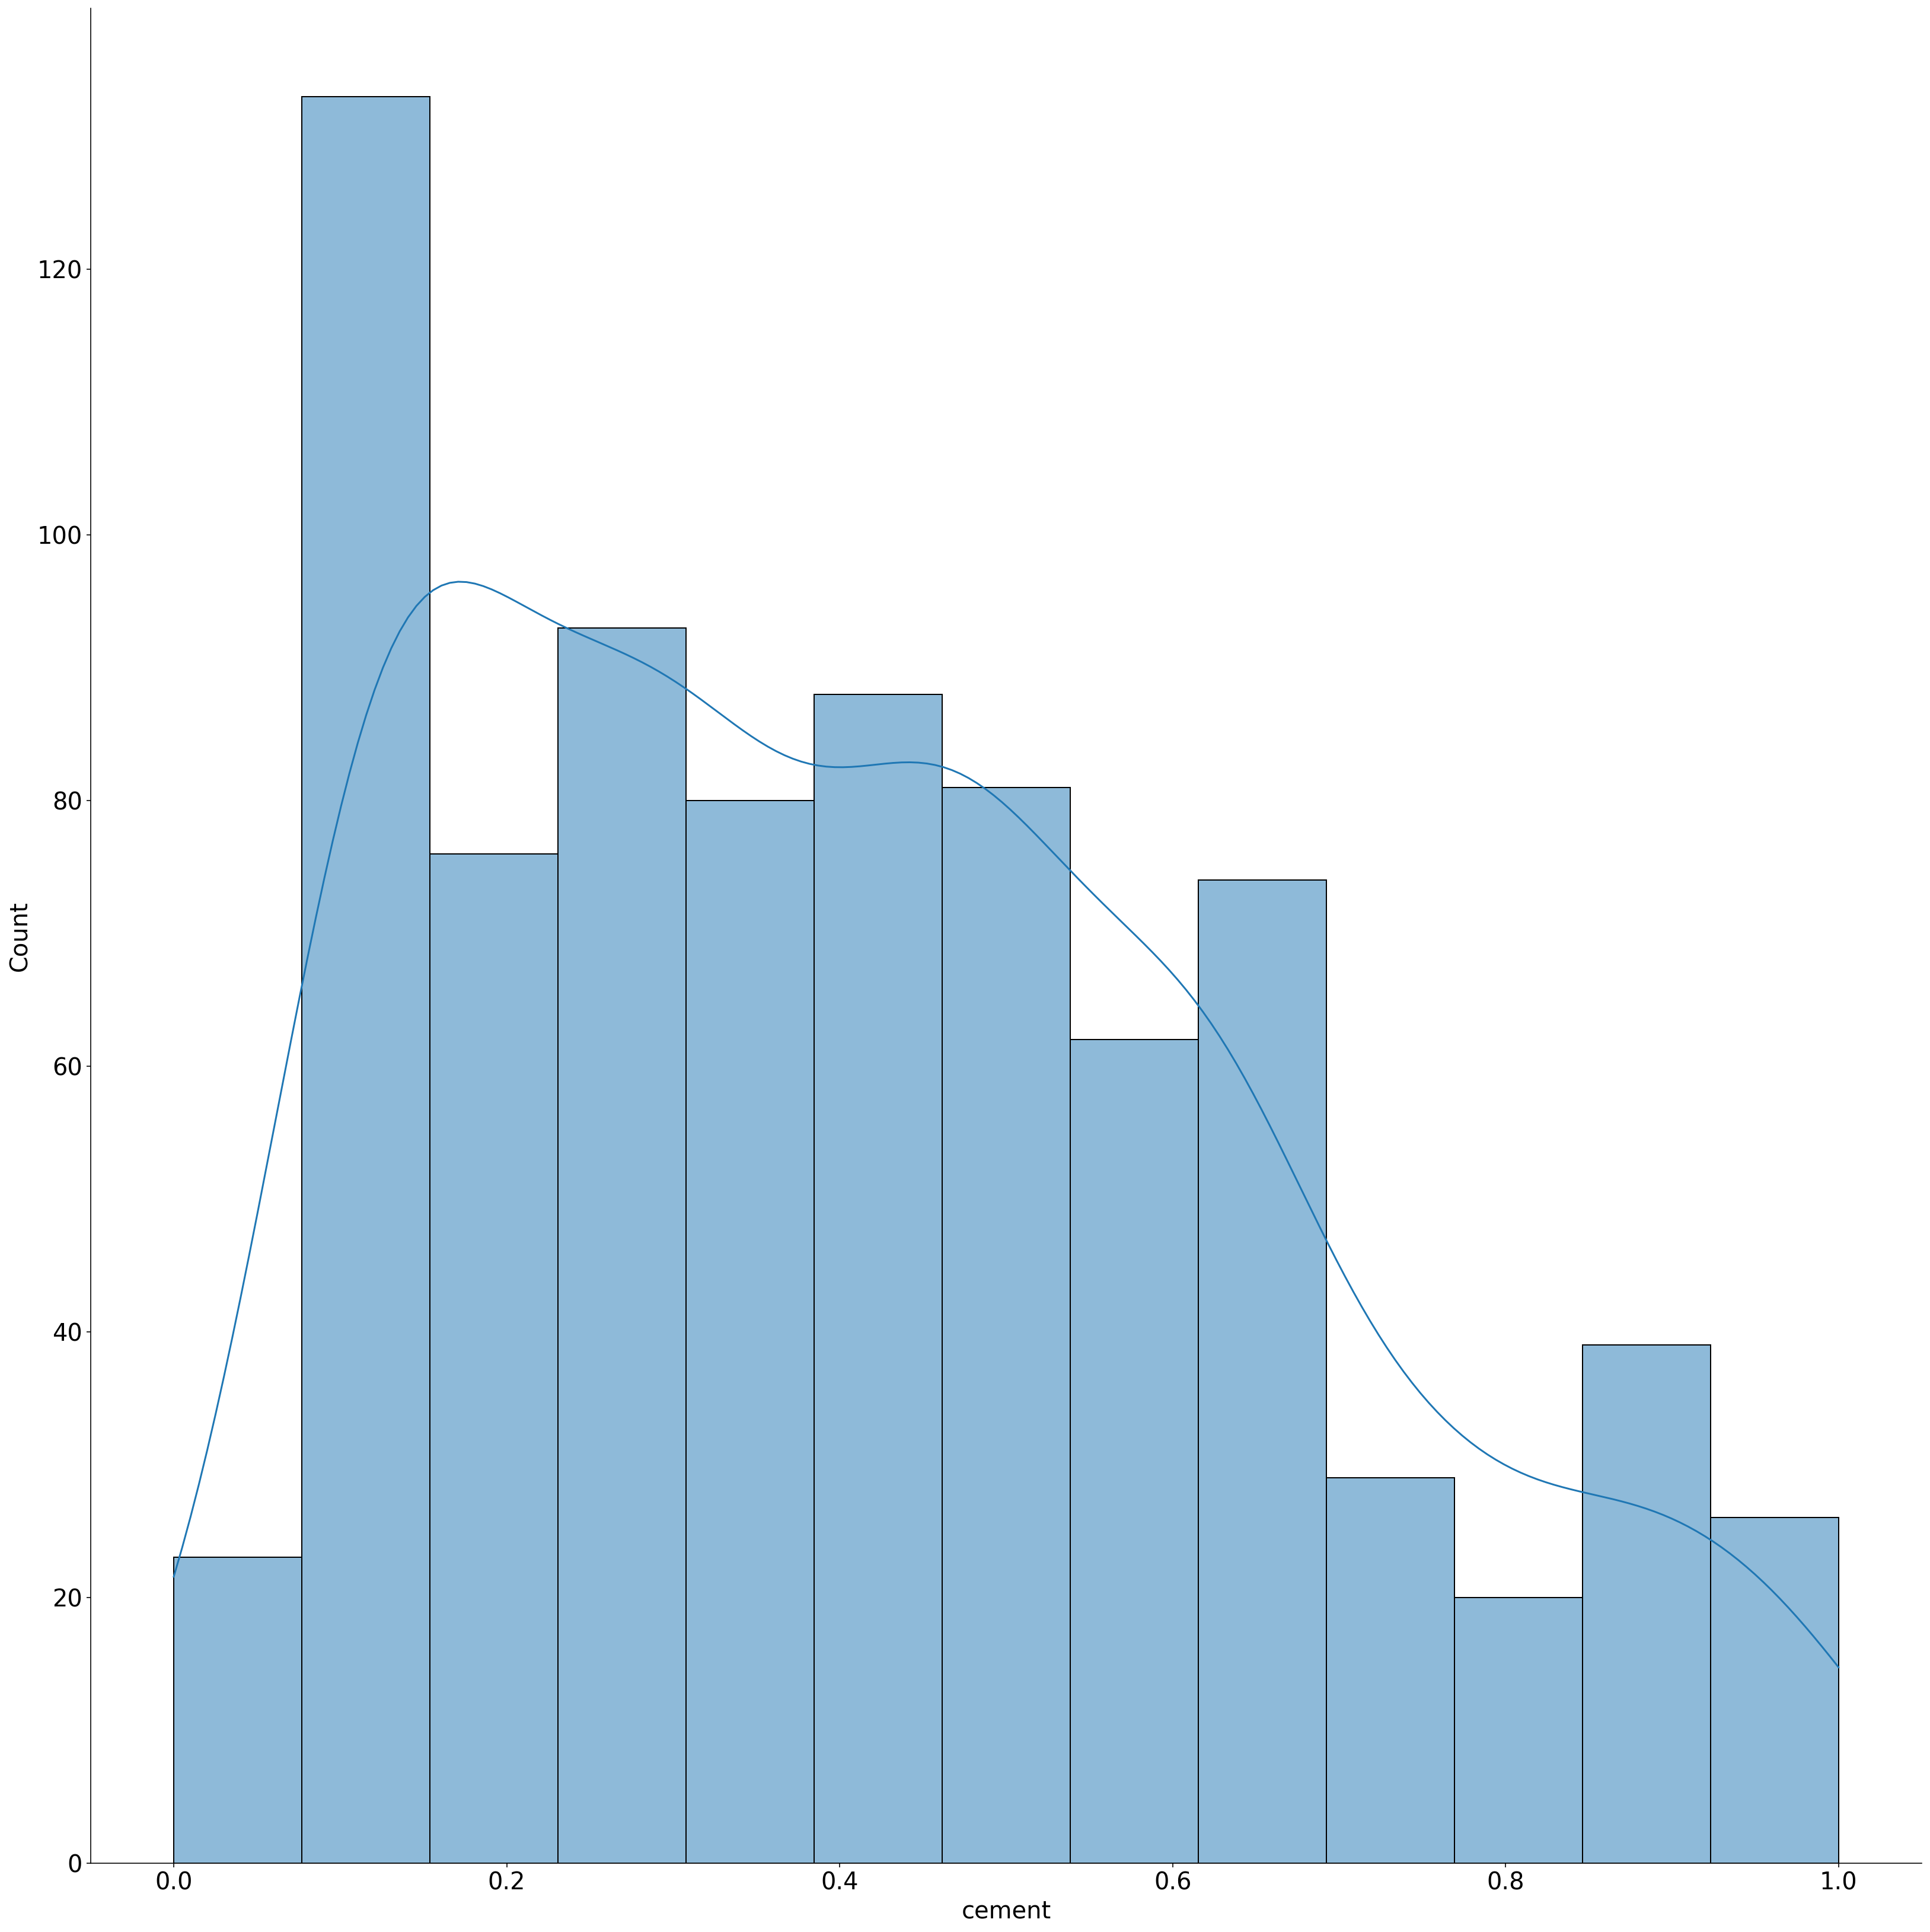

In [15]:
# Example: Cement feature
sns.displot(
    data=df_norm, kind="hist", kde=True,
    x="cement", height=23);

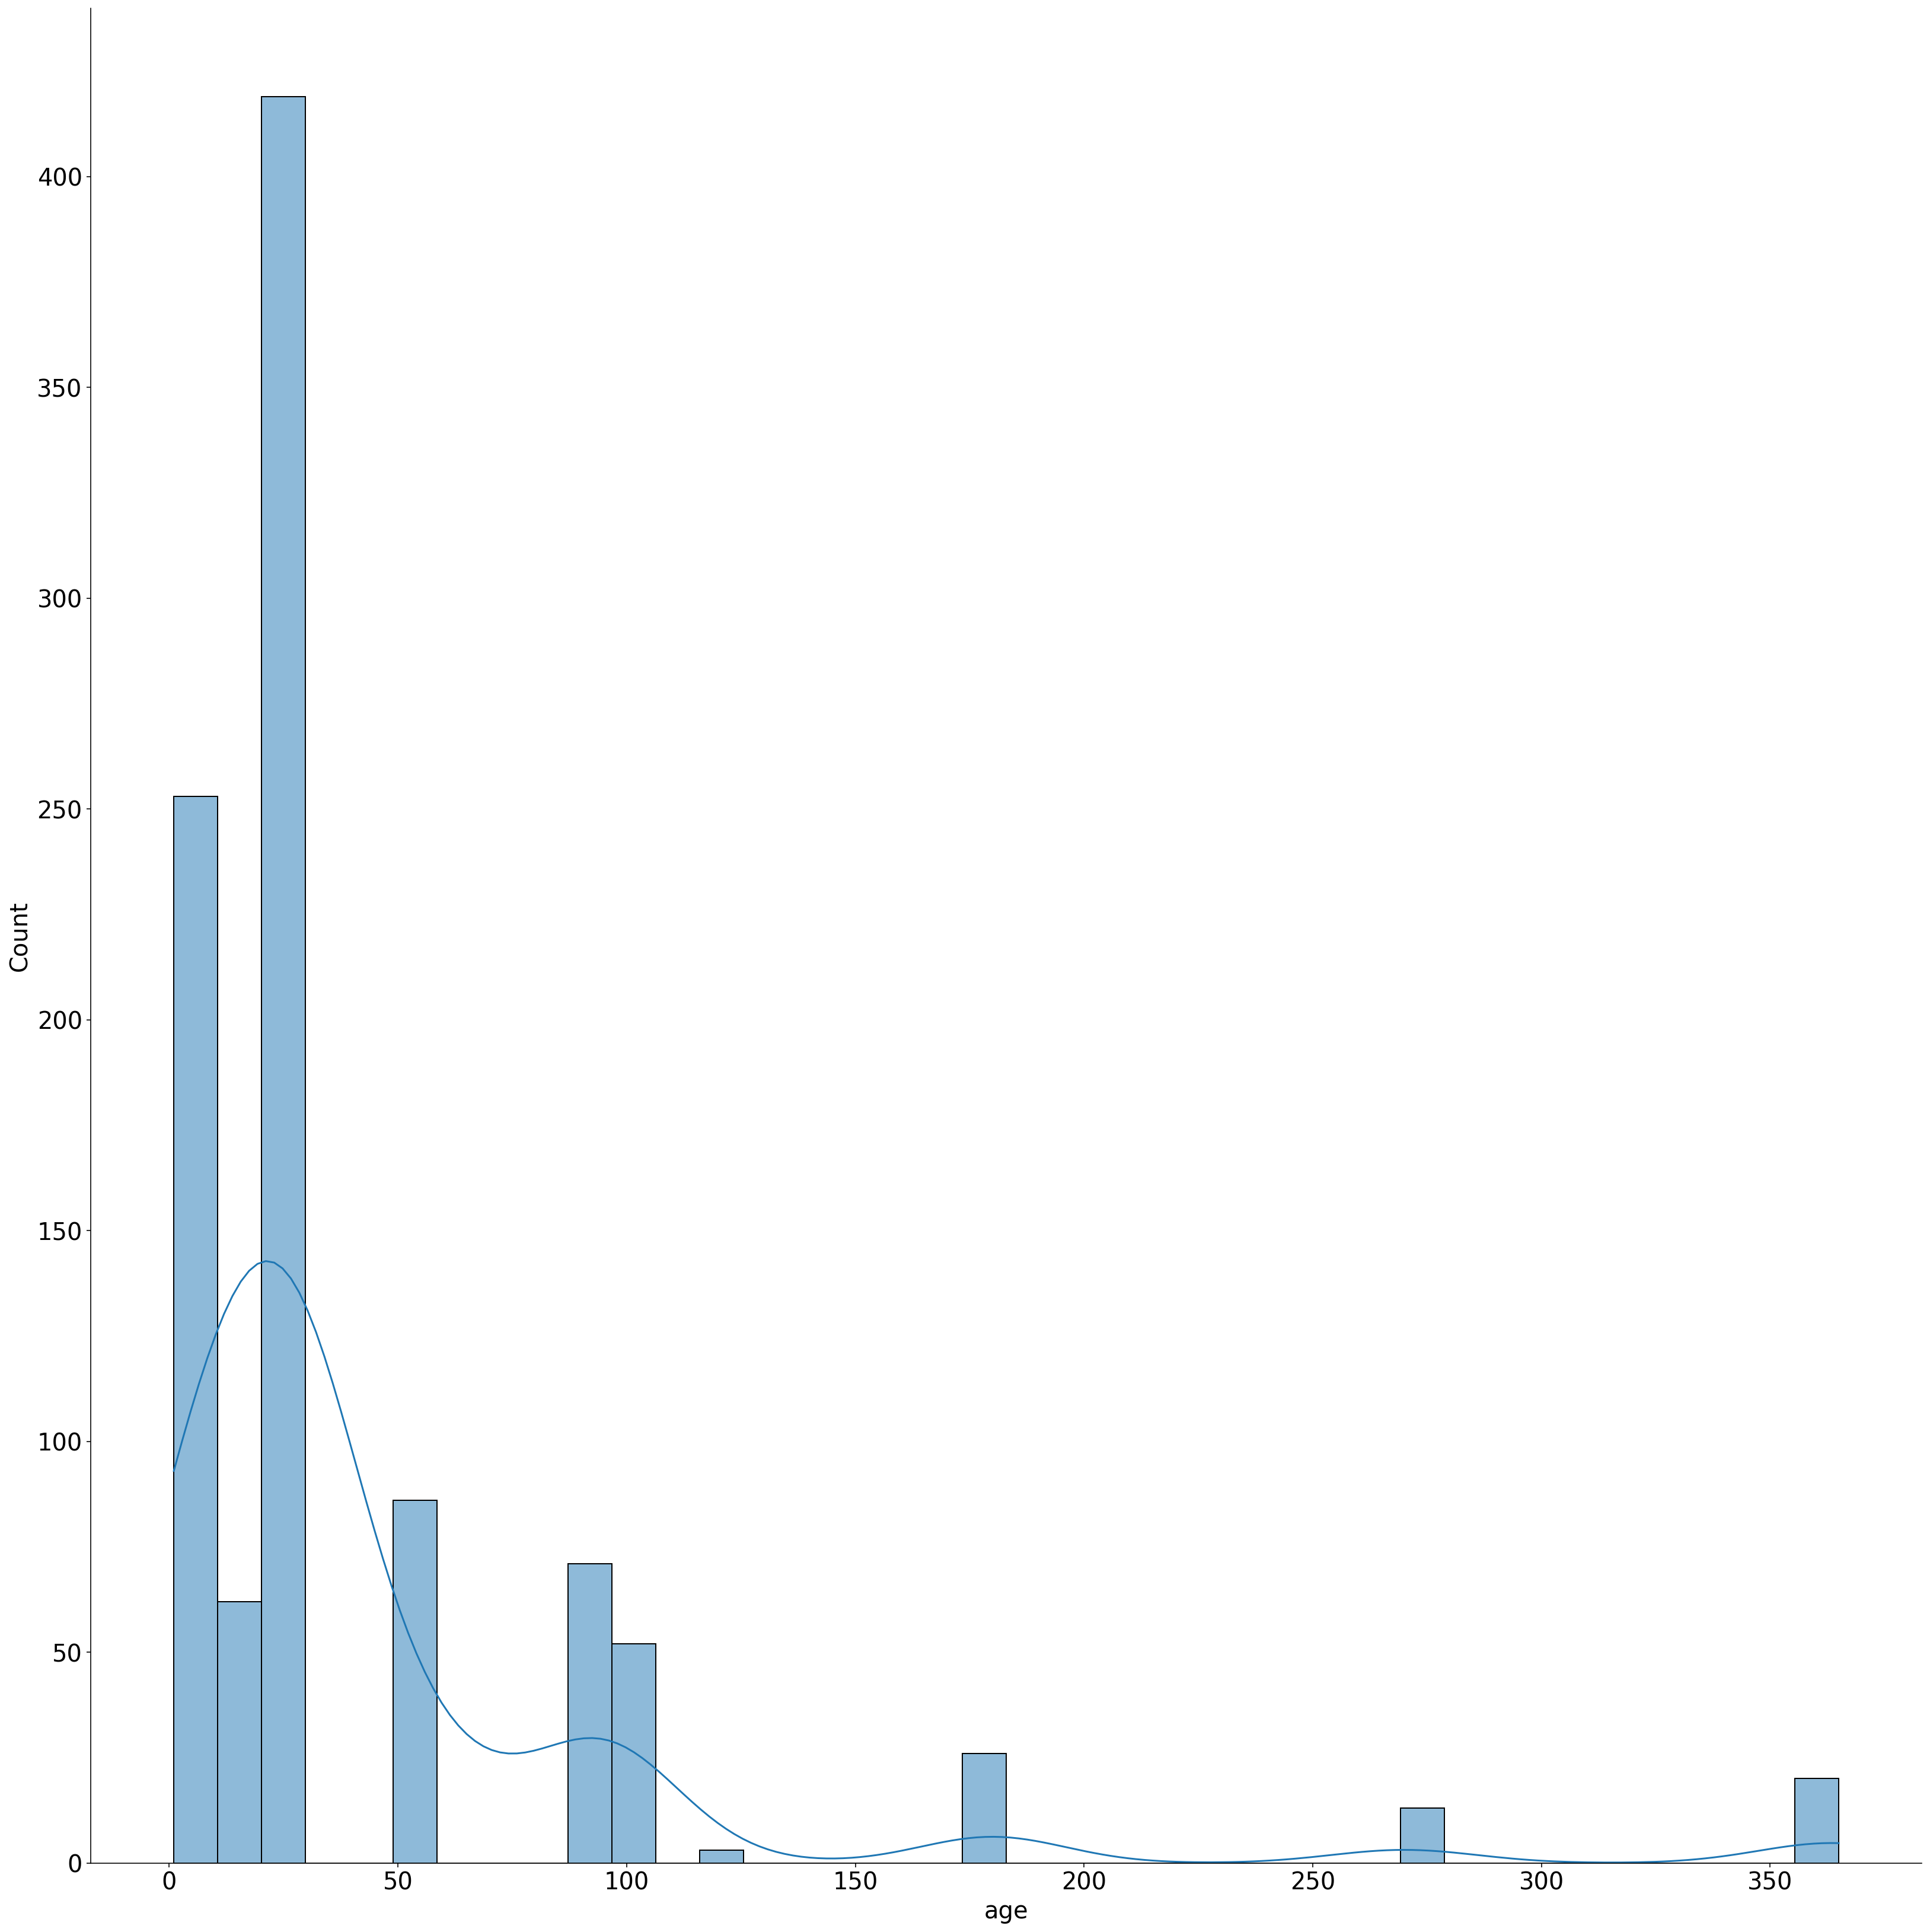

In [16]:
# Example: age feature
sns.displot(
    data=df, kind="hist", kde=True,
    x="age", height=23);

Let's study better the correlations between the target variable and two features: "cement" and "age".

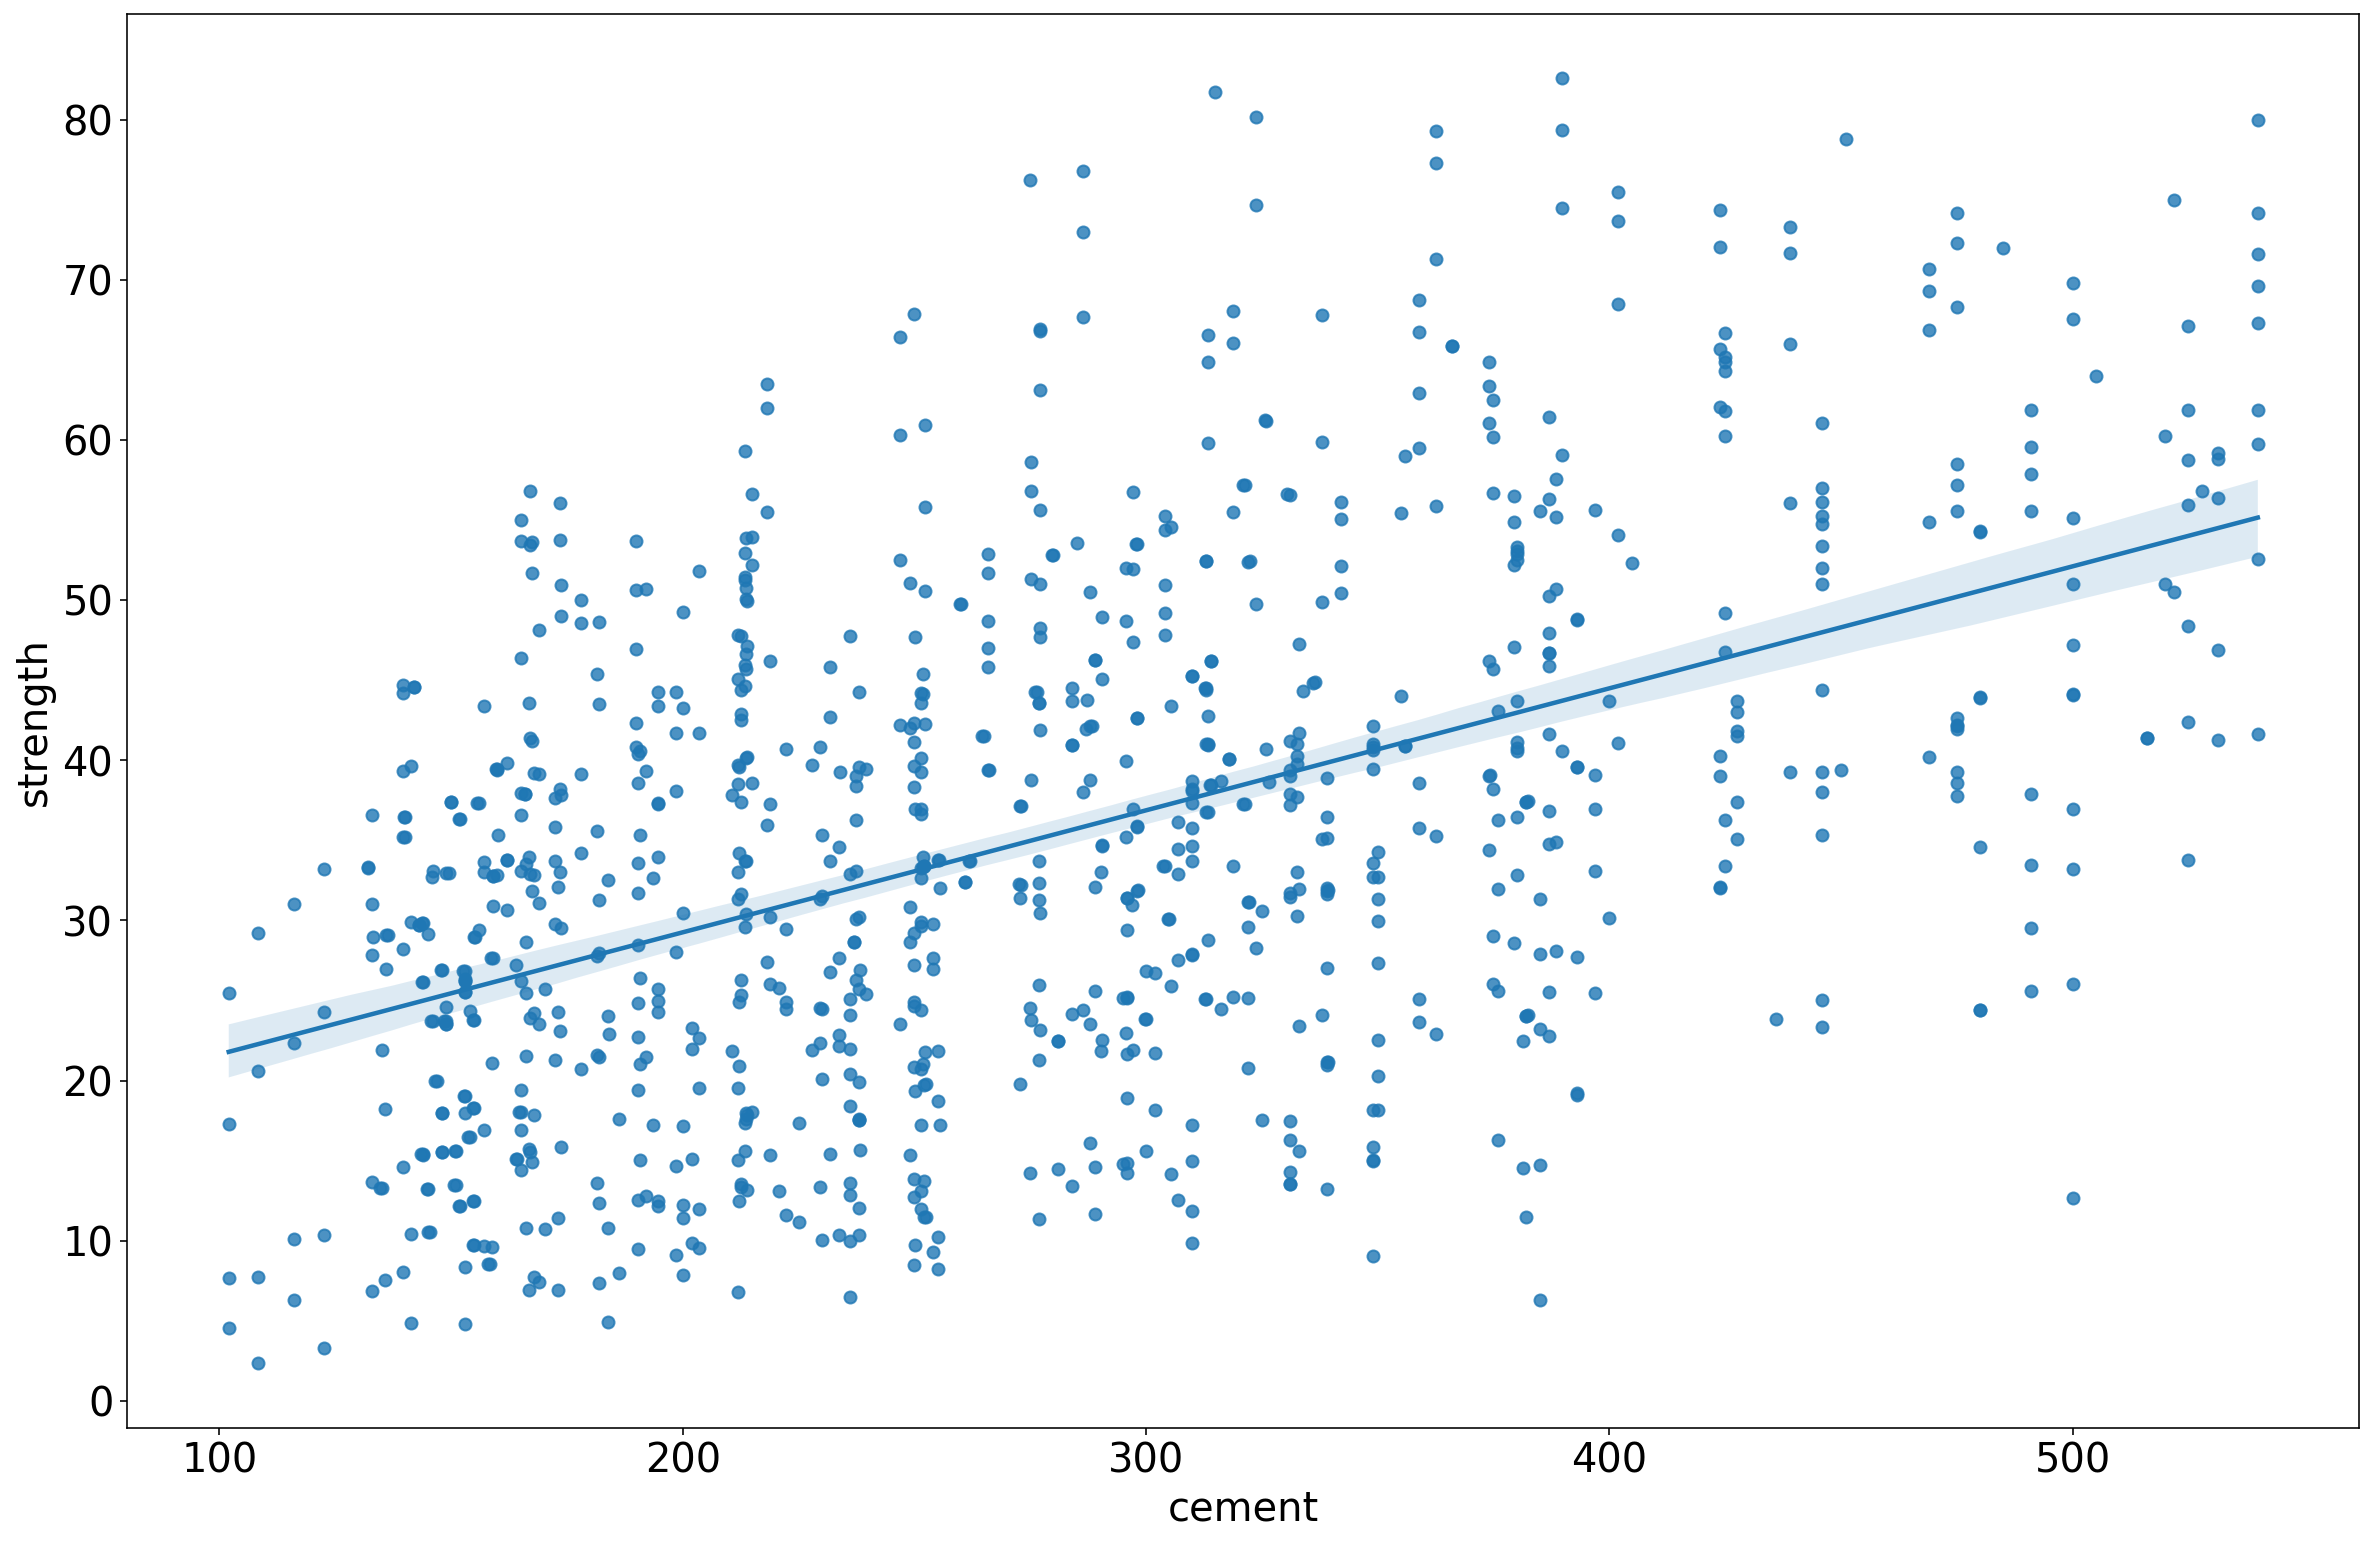

In [17]:
sns.regplot(data= df, x="cement", y="strength");

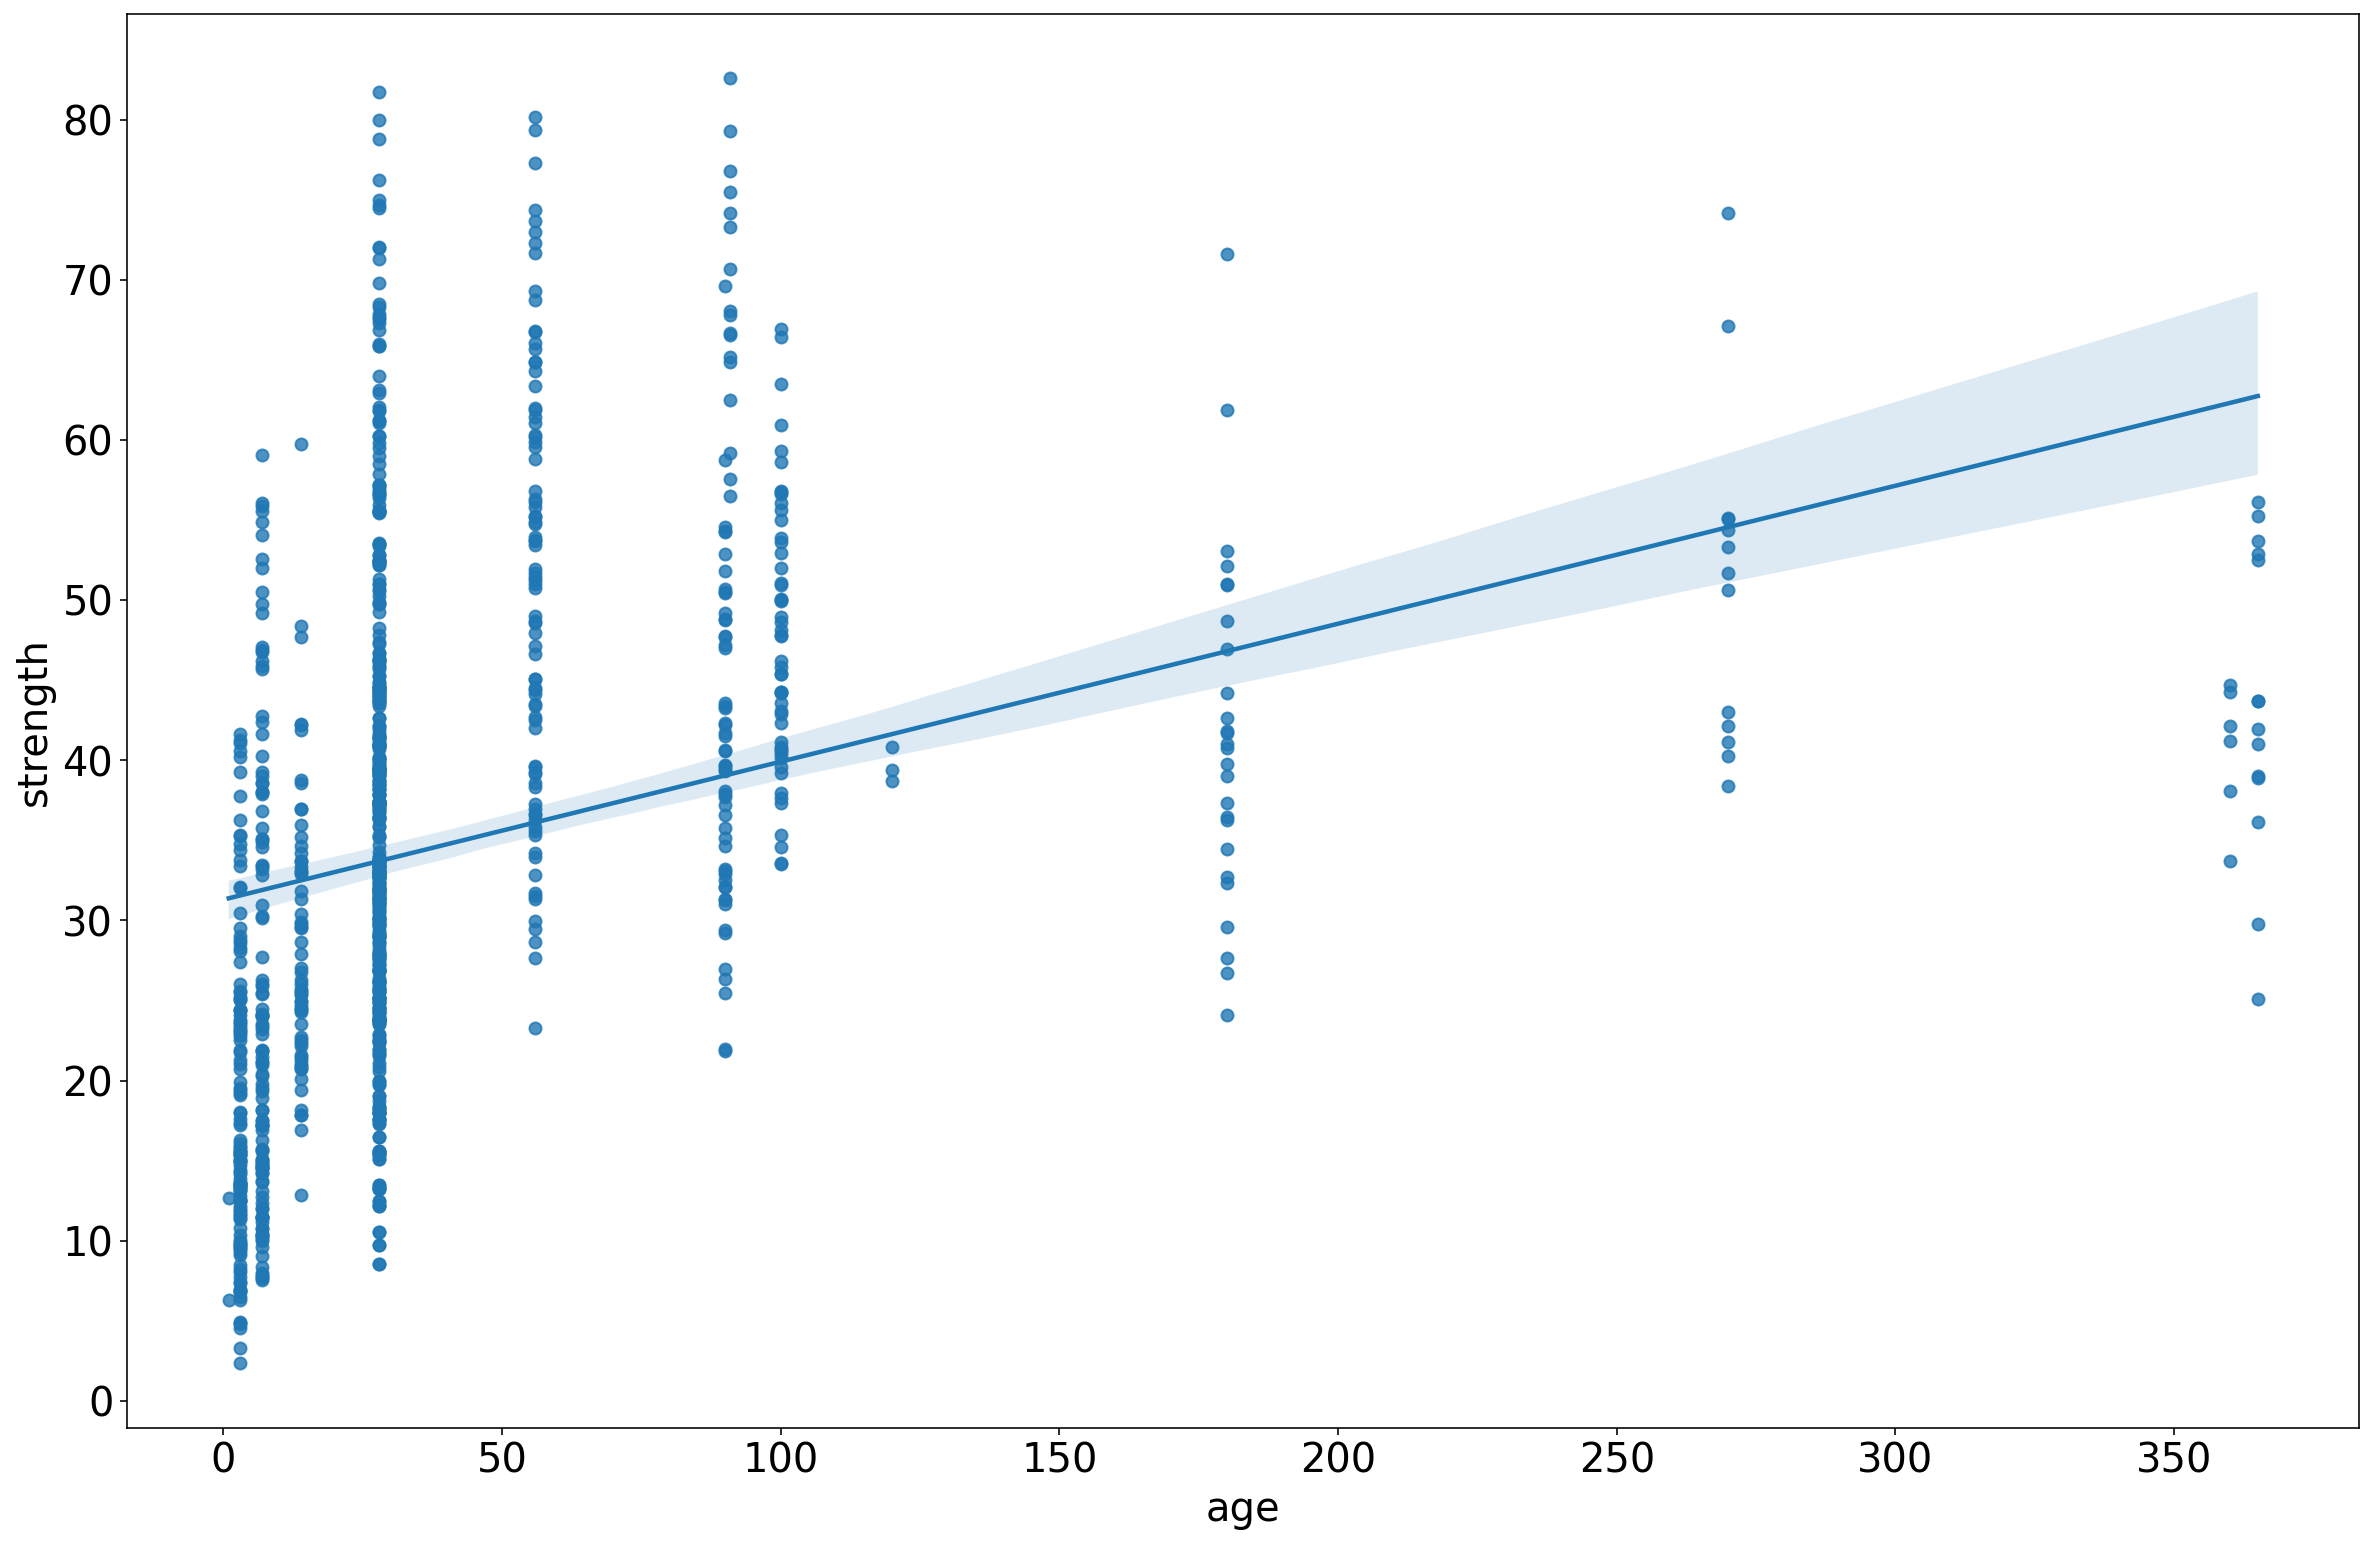

In [18]:
sns.regplot(data= df, x="age", y="strength");

#### Composite features

We can see from the dataset description that the first seven features are actually components added in a $m^3$ of mixture.
Let's try to build the sum of the first seven features in the three dataset to see whether this is correlated with the target variable. 

In [19]:
df['sum_components'] = df.iloc[:, :-2].sum(axis=1)
df_norm['sum_components'] = df_norm.iloc[:, :-2].sum(axis=1)
df_stnd['sum_components'] = df_stnd.iloc[:, :-2].sum(axis=1)

In [20]:
col_list = list(df)
col_list[-1], col_list[-2] = col_list[-2], col_list[-1]
df = df.reindex(columns=col_list)

In [21]:
df

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0      540.0    0.0    0.0  162.0           2.5     1040.0    676.0   28   
1      540.0    0.0    0.0  162.0           2.5     1055.0    676.0   28   
2      332.5  142.5    0.0  228.0           0.0      932.0    594.0  270   
3      332.5  142.5    0.0  228.0           0.0      932.0    594.0  365   
4      198.6  132.4    0.0  192.0           0.0      978.4    825.5  360   
...      ...    ...    ...    ...           ...        ...      ...  ...   
1025   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28   
1026   322.2    0.0  115.6  196.0          10.4      817.9    813.4   28   
1027   148.5  139.4  108.6  192.7           6.1      892.4    780.0   28   
1028   159.1  186.7    0.0  175.6          11.3      989.6    788.9   28   
1029   260.9  100.5   78.3  200.6           8.6      864.5    761.5   28   

      sum_components  strength  
0             2420.5     79.99  
1             2435.5     61.89  
2             2229.0     40.27  
3             2229.0     41.05  
4             2326.9     44.30  
...              ...       ...  
1025          2309.6     44.28  
1026          2275.5     31.18  
1027          2267.7     23.70  
1028          2311.2     32.77  
1029          2274.9     32.40  

[1005 rows x 10 columns]

In [22]:
df_norm['strength'] = y_train
df_norm

cement      slag       ash     water  superplastic  coarseagg  \
0    0.129224  0.414302  0.594872  0.425719      0.465839   0.442733   
1    0.735160  0.061213  0.676923  0.448882      0.263975   0.061047   
2    0.395205  0.000000  0.622564  0.301118      0.307453   0.734302   
3    0.342466  0.269894  0.389744  0.576677      0.248447   0.098837   
4    0.152740  0.117418  0.637436  0.291534      0.335404   0.813372   
..        ...       ...       ...       ...           ...        ...   
819  0.420776  0.558987  0.000000  0.182907      0.347826   0.591860   
820  0.330594  0.000000  0.641538  0.171725      0.372671   0.830814   
821  0.201598  0.000000  0.642051  0.357827      0.307453   0.808140   
822  0.851598  0.330551  0.000000  0.473642      0.276398   0.148547   
823  0.484018  0.000000  0.579487  0.384984      0.310559   0.360465   

      fineagg       age  sum_components  strength  
0    0.315354  0.074176        2.472687     27.68  
1    0.391370  0.074176        2.247199     62.05  
2    0.460361  0.005495        2.360644     23.80  
3    0.569493  0.074176        1.926065     33.40  
4    0.507275  0.005495        2.347903      7.40  
..        ...       ...             ...       ...  
819  0.526091  0.005495        2.102357     24.40  
820  0.519067  0.035714        2.347342     42.22  
821  0.514049  0.271978        2.317070     33.56  
822  0.470396  0.074176        2.080735     68.30  
823  0.474160  0.074176        2.119514     38.46  

[824 rows x 10 columns]

In [23]:
df_stnd['strength'] = y_train
df_stnd

cement      slag       ash     water  superplastic  coarseagg  \
0   -1.160877  0.857387  0.982449 -0.314285      1.481654  -0.257462   
1    1.308623 -0.602492  1.232598 -0.178192      0.391715  -1.926950   
2   -0.076865 -0.855584  1.066874 -1.046371      0.626471   1.017859   
3   -0.291807  0.260321  0.357076  0.572666      0.307873  -1.761654   
4   -1.065038 -0.370108  1.112214 -1.102686      0.777385   1.363709   
..        ...       ...       ...       ...           ...        ...   
819  0.027349  1.455604 -0.831134 -1.740915      0.844459   0.394821   
820 -0.340192 -0.855584  1.124721 -1.806615      0.978605   1.440000   
821 -0.865914 -0.855584  1.126285 -0.713178      0.626471   1.340822   
822  1.783169  0.511112 -0.831134 -0.032713      0.458788  -1.544226   
823  0.285092 -0.855584  0.935546 -0.553621      0.643239  -0.617298   

      fineagg       age  sum_components  strength  
0   -0.647520 -0.275673        1.588866     27.68  
1   -0.273148 -0.275673        0.225302     62.05  
2    0.066628 -0.689313        0.732384     23.80  
3    0.604093 -0.275673       -0.555525     33.40  
4    0.297676 -0.689313        0.715478      7.40  
..        ...       ...             ...       ...  
819  0.390343 -0.689313        0.150185     24.40  
820  0.355747 -0.507312        0.540936     42.22  
821  0.331036  0.915611        0.658901     33.56  
822  0.116050 -0.275673        0.344996     68.30  
823  0.134584 -0.275673       -0.162625     38.46  

[824 rows x 10 columns]

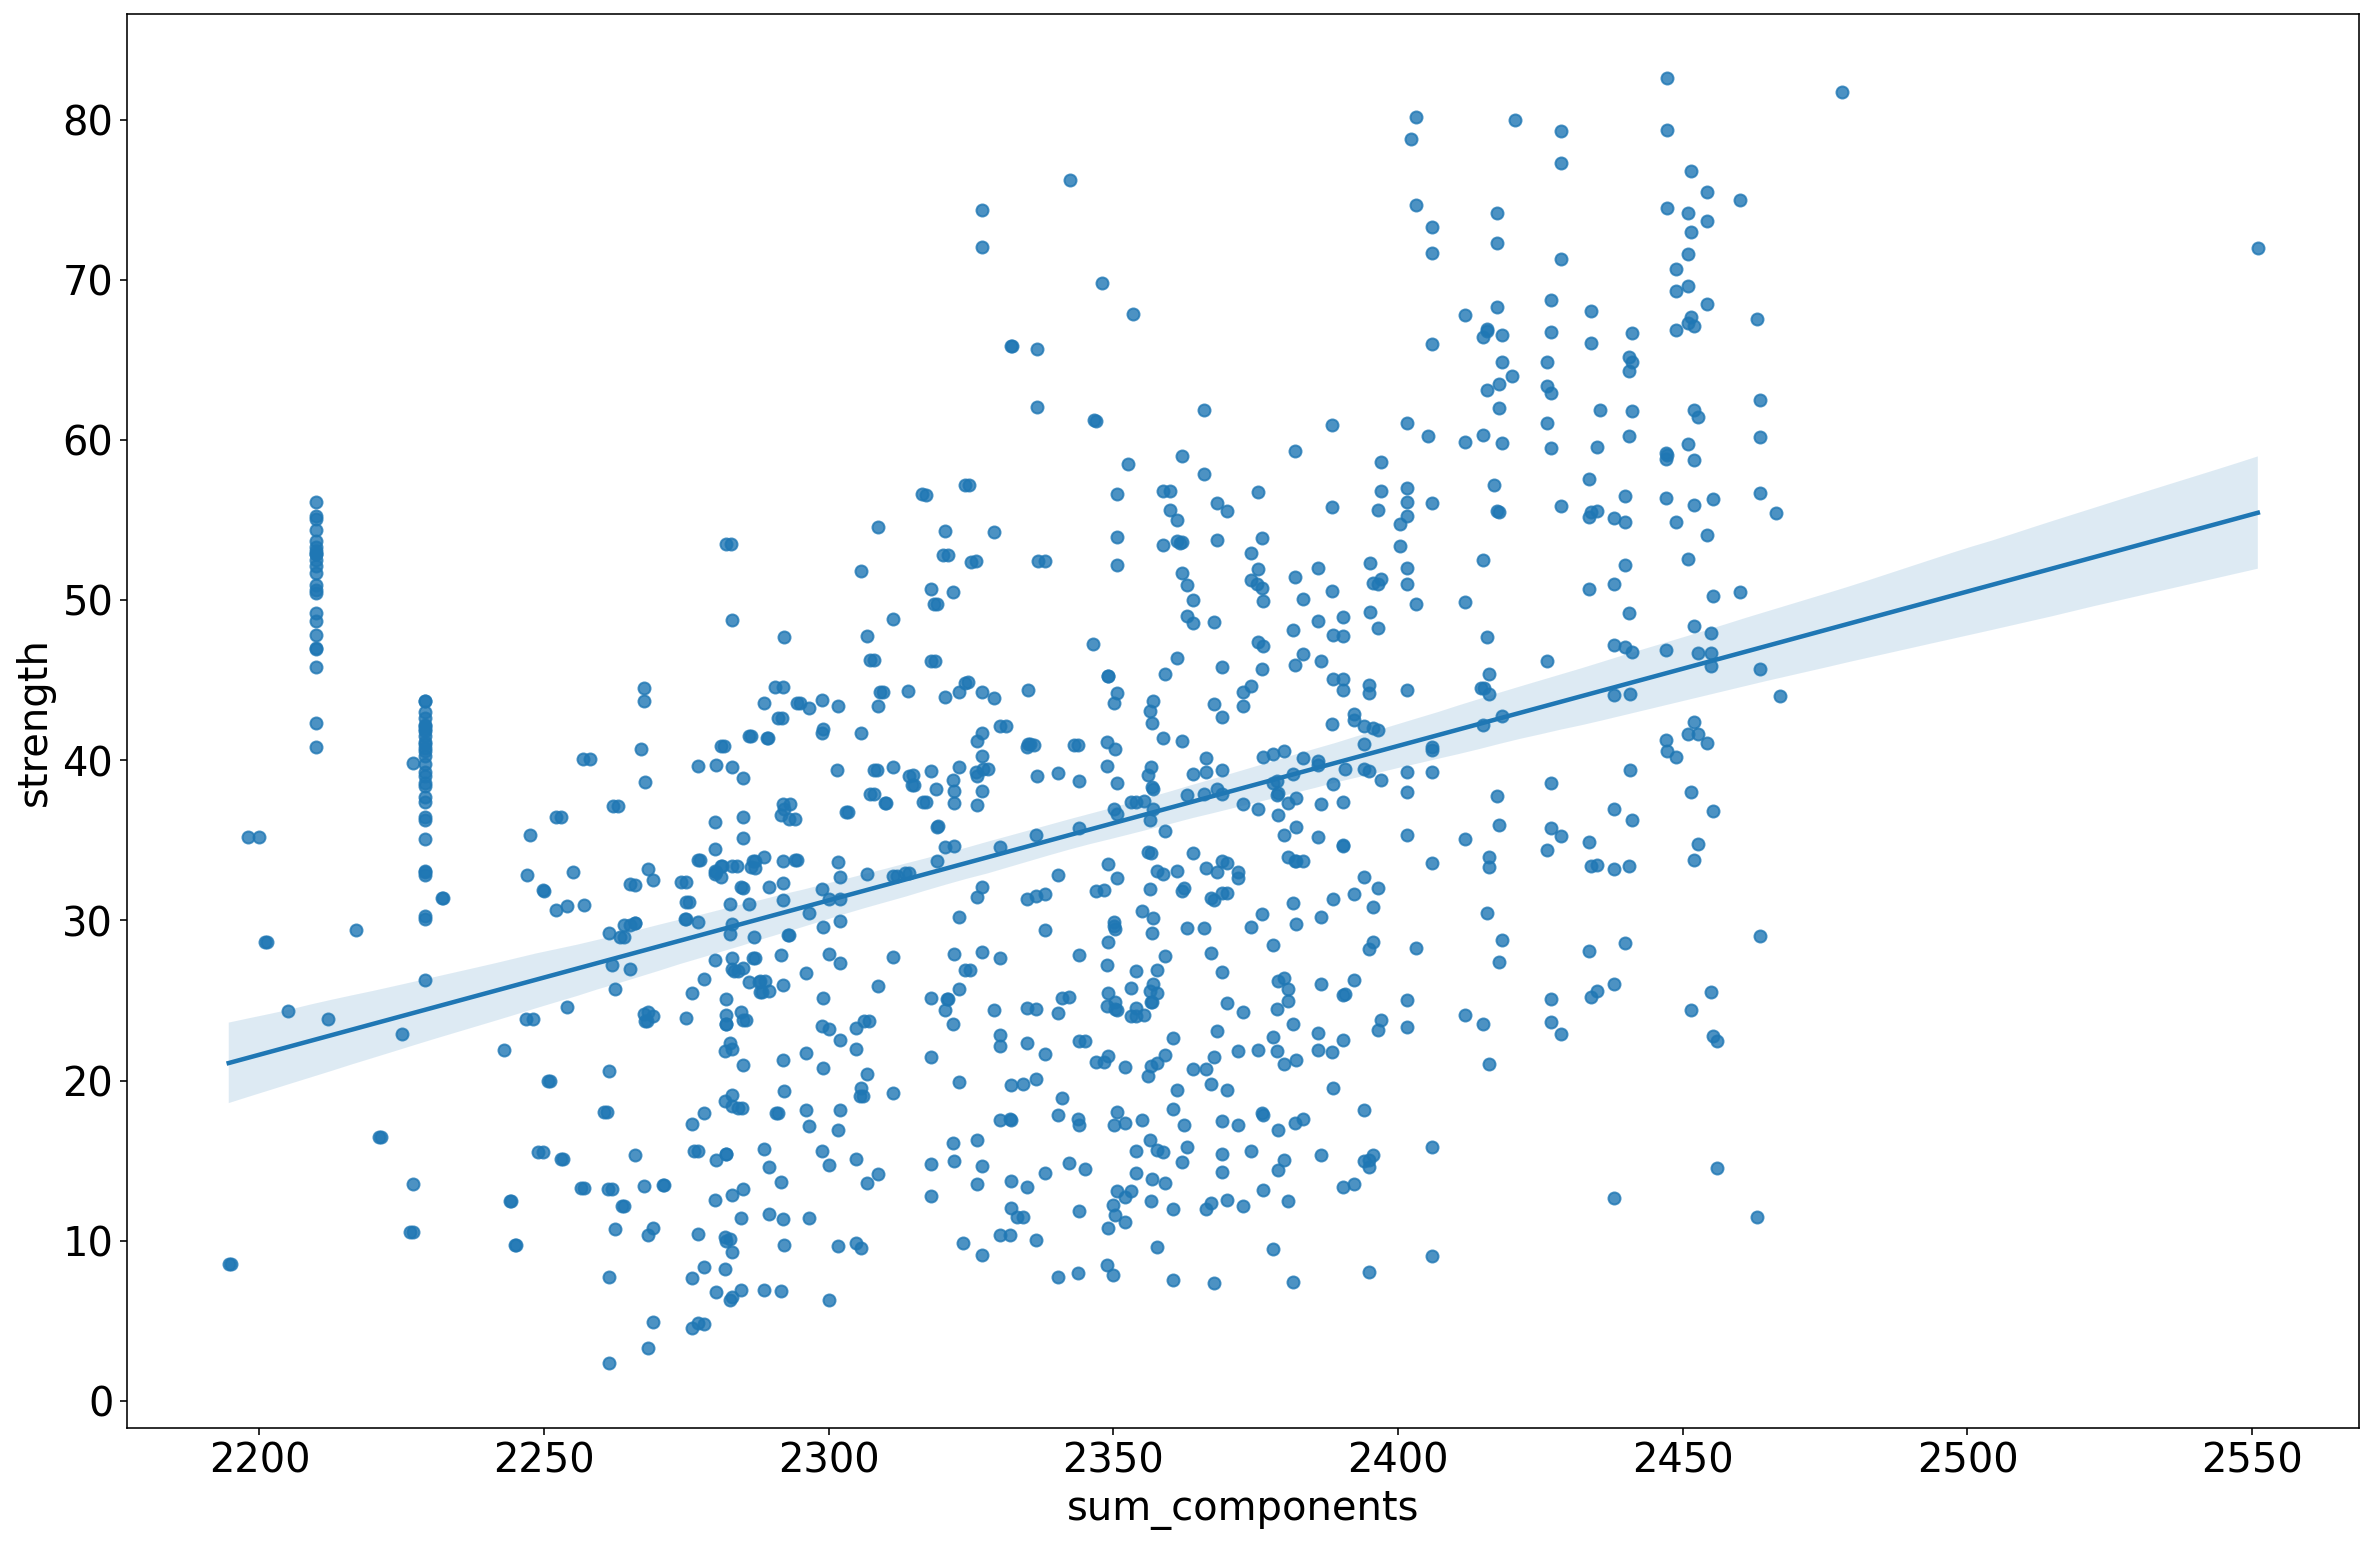

In [24]:
sns.regplot(data=df, x="sum_components", y="strength");

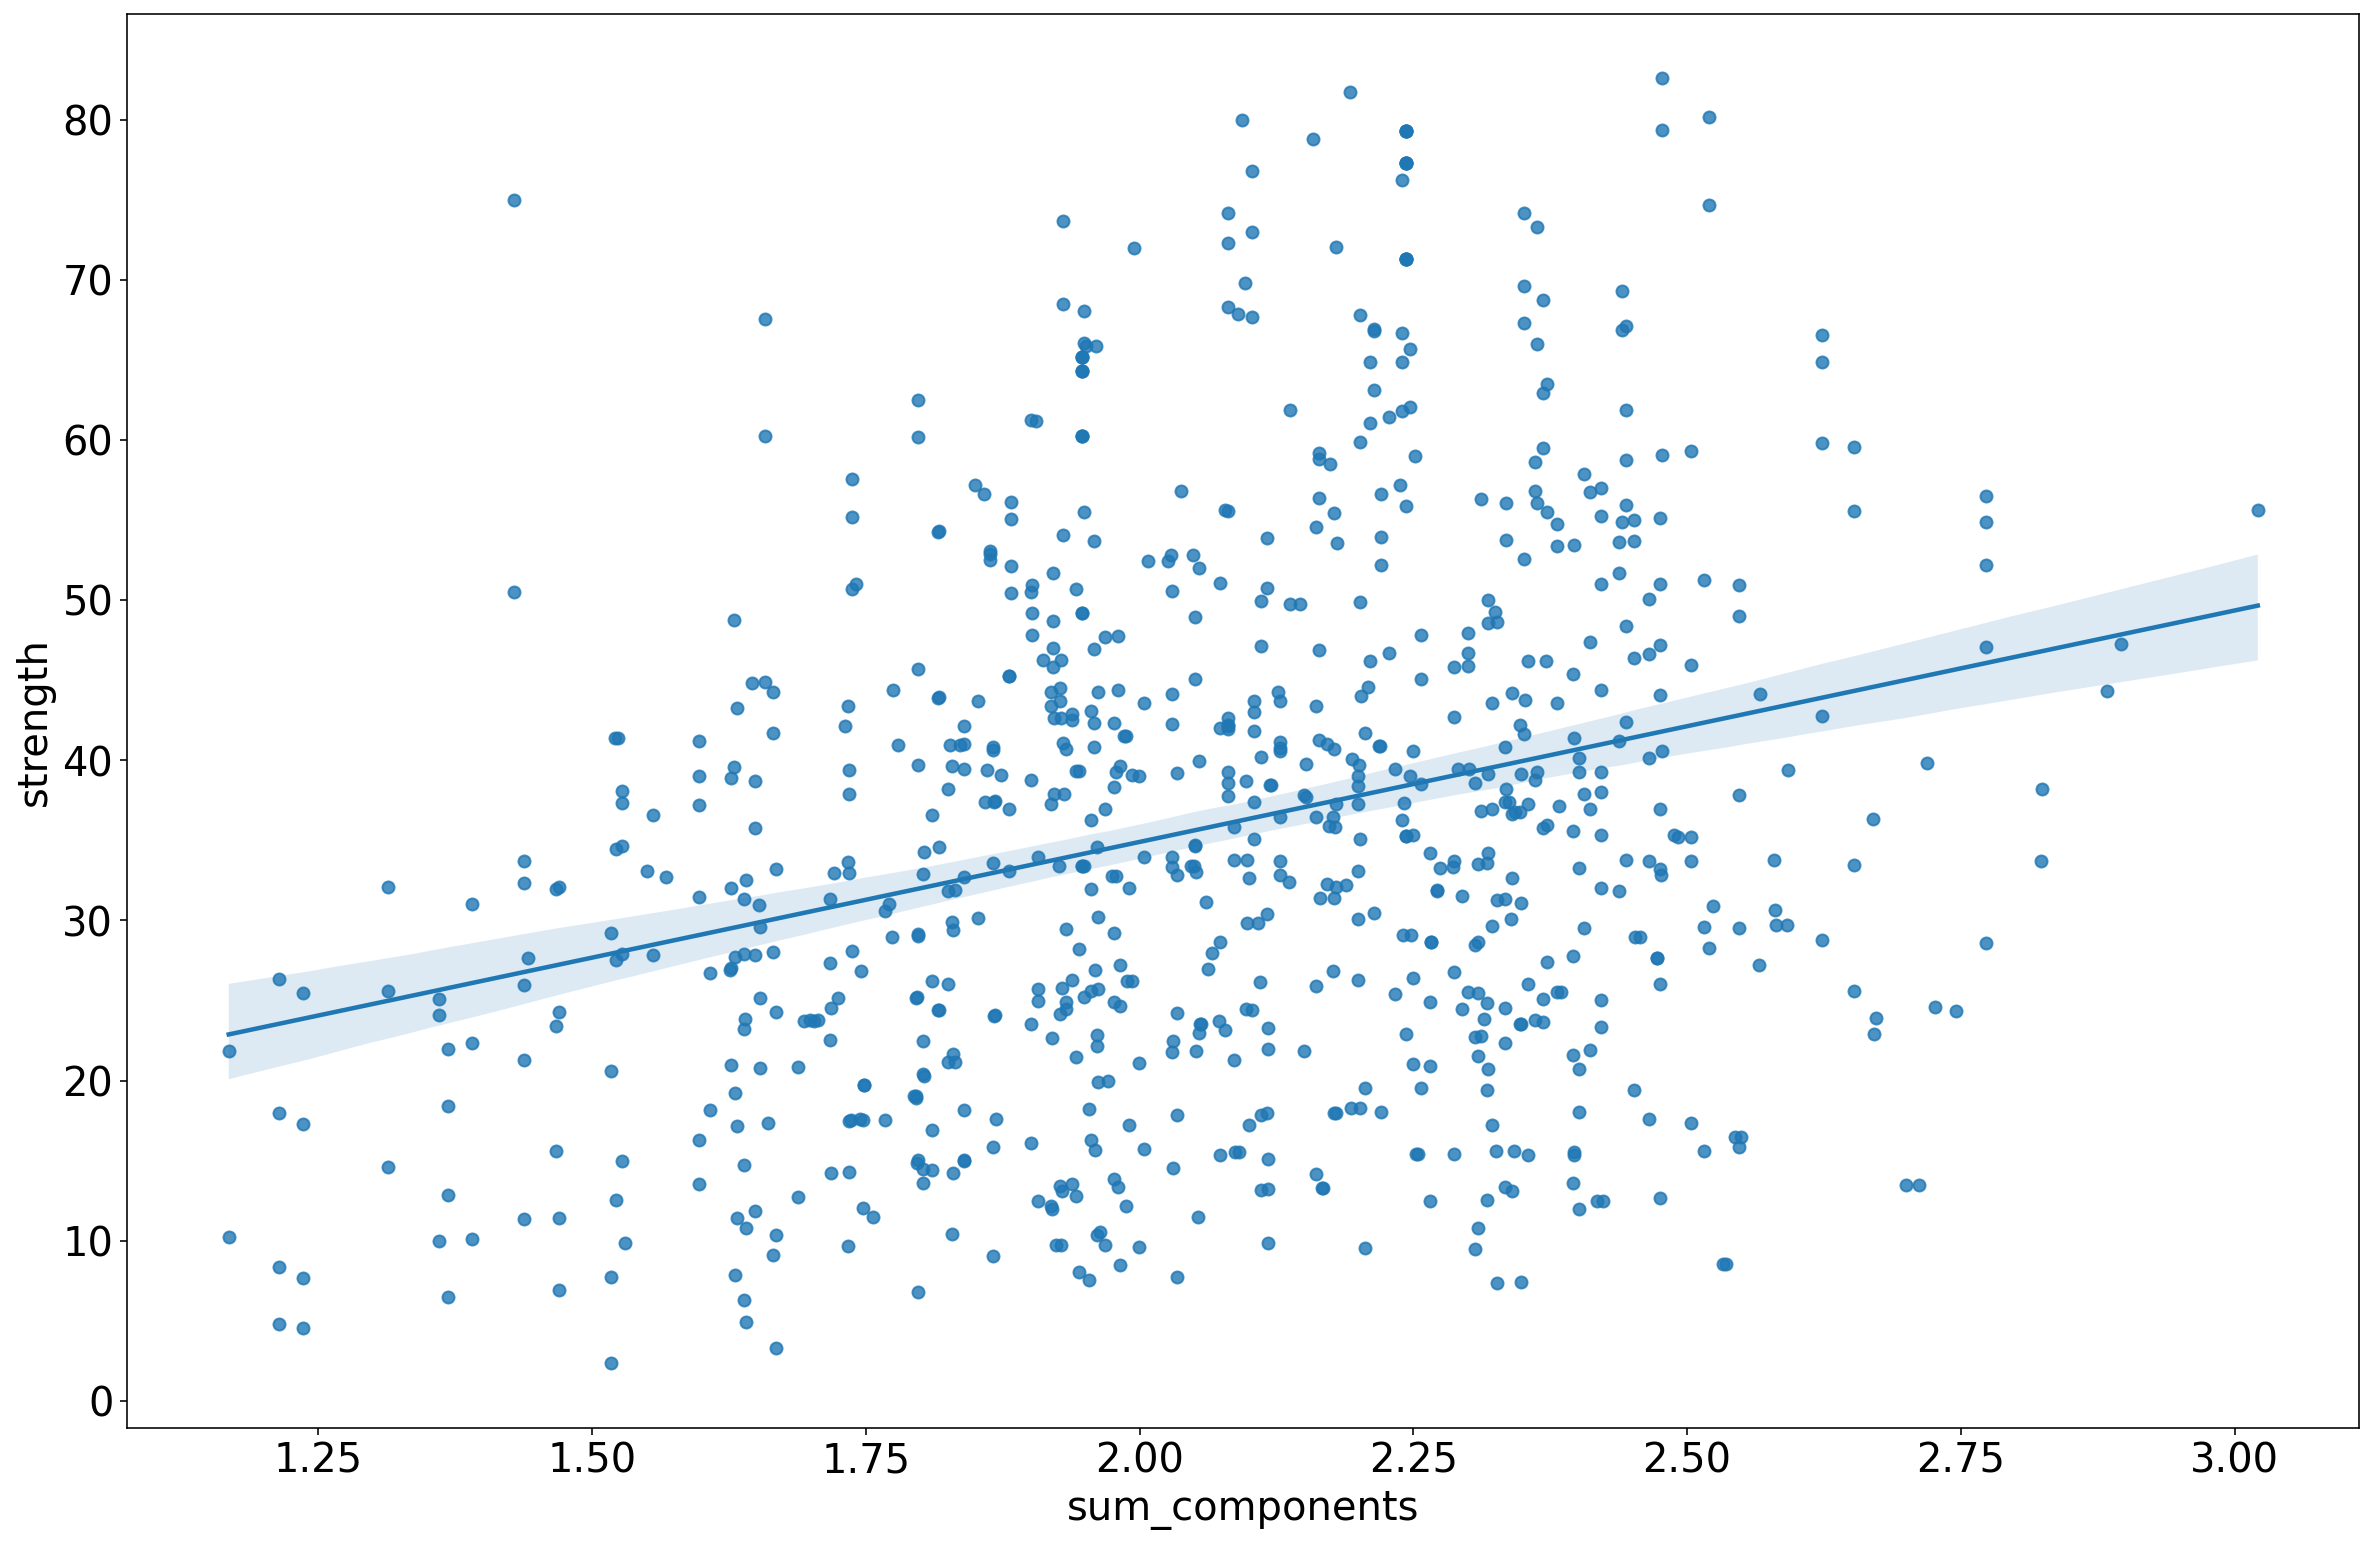

In [25]:
sns.regplot(data=df_norm, x="sum_components", y="strength");

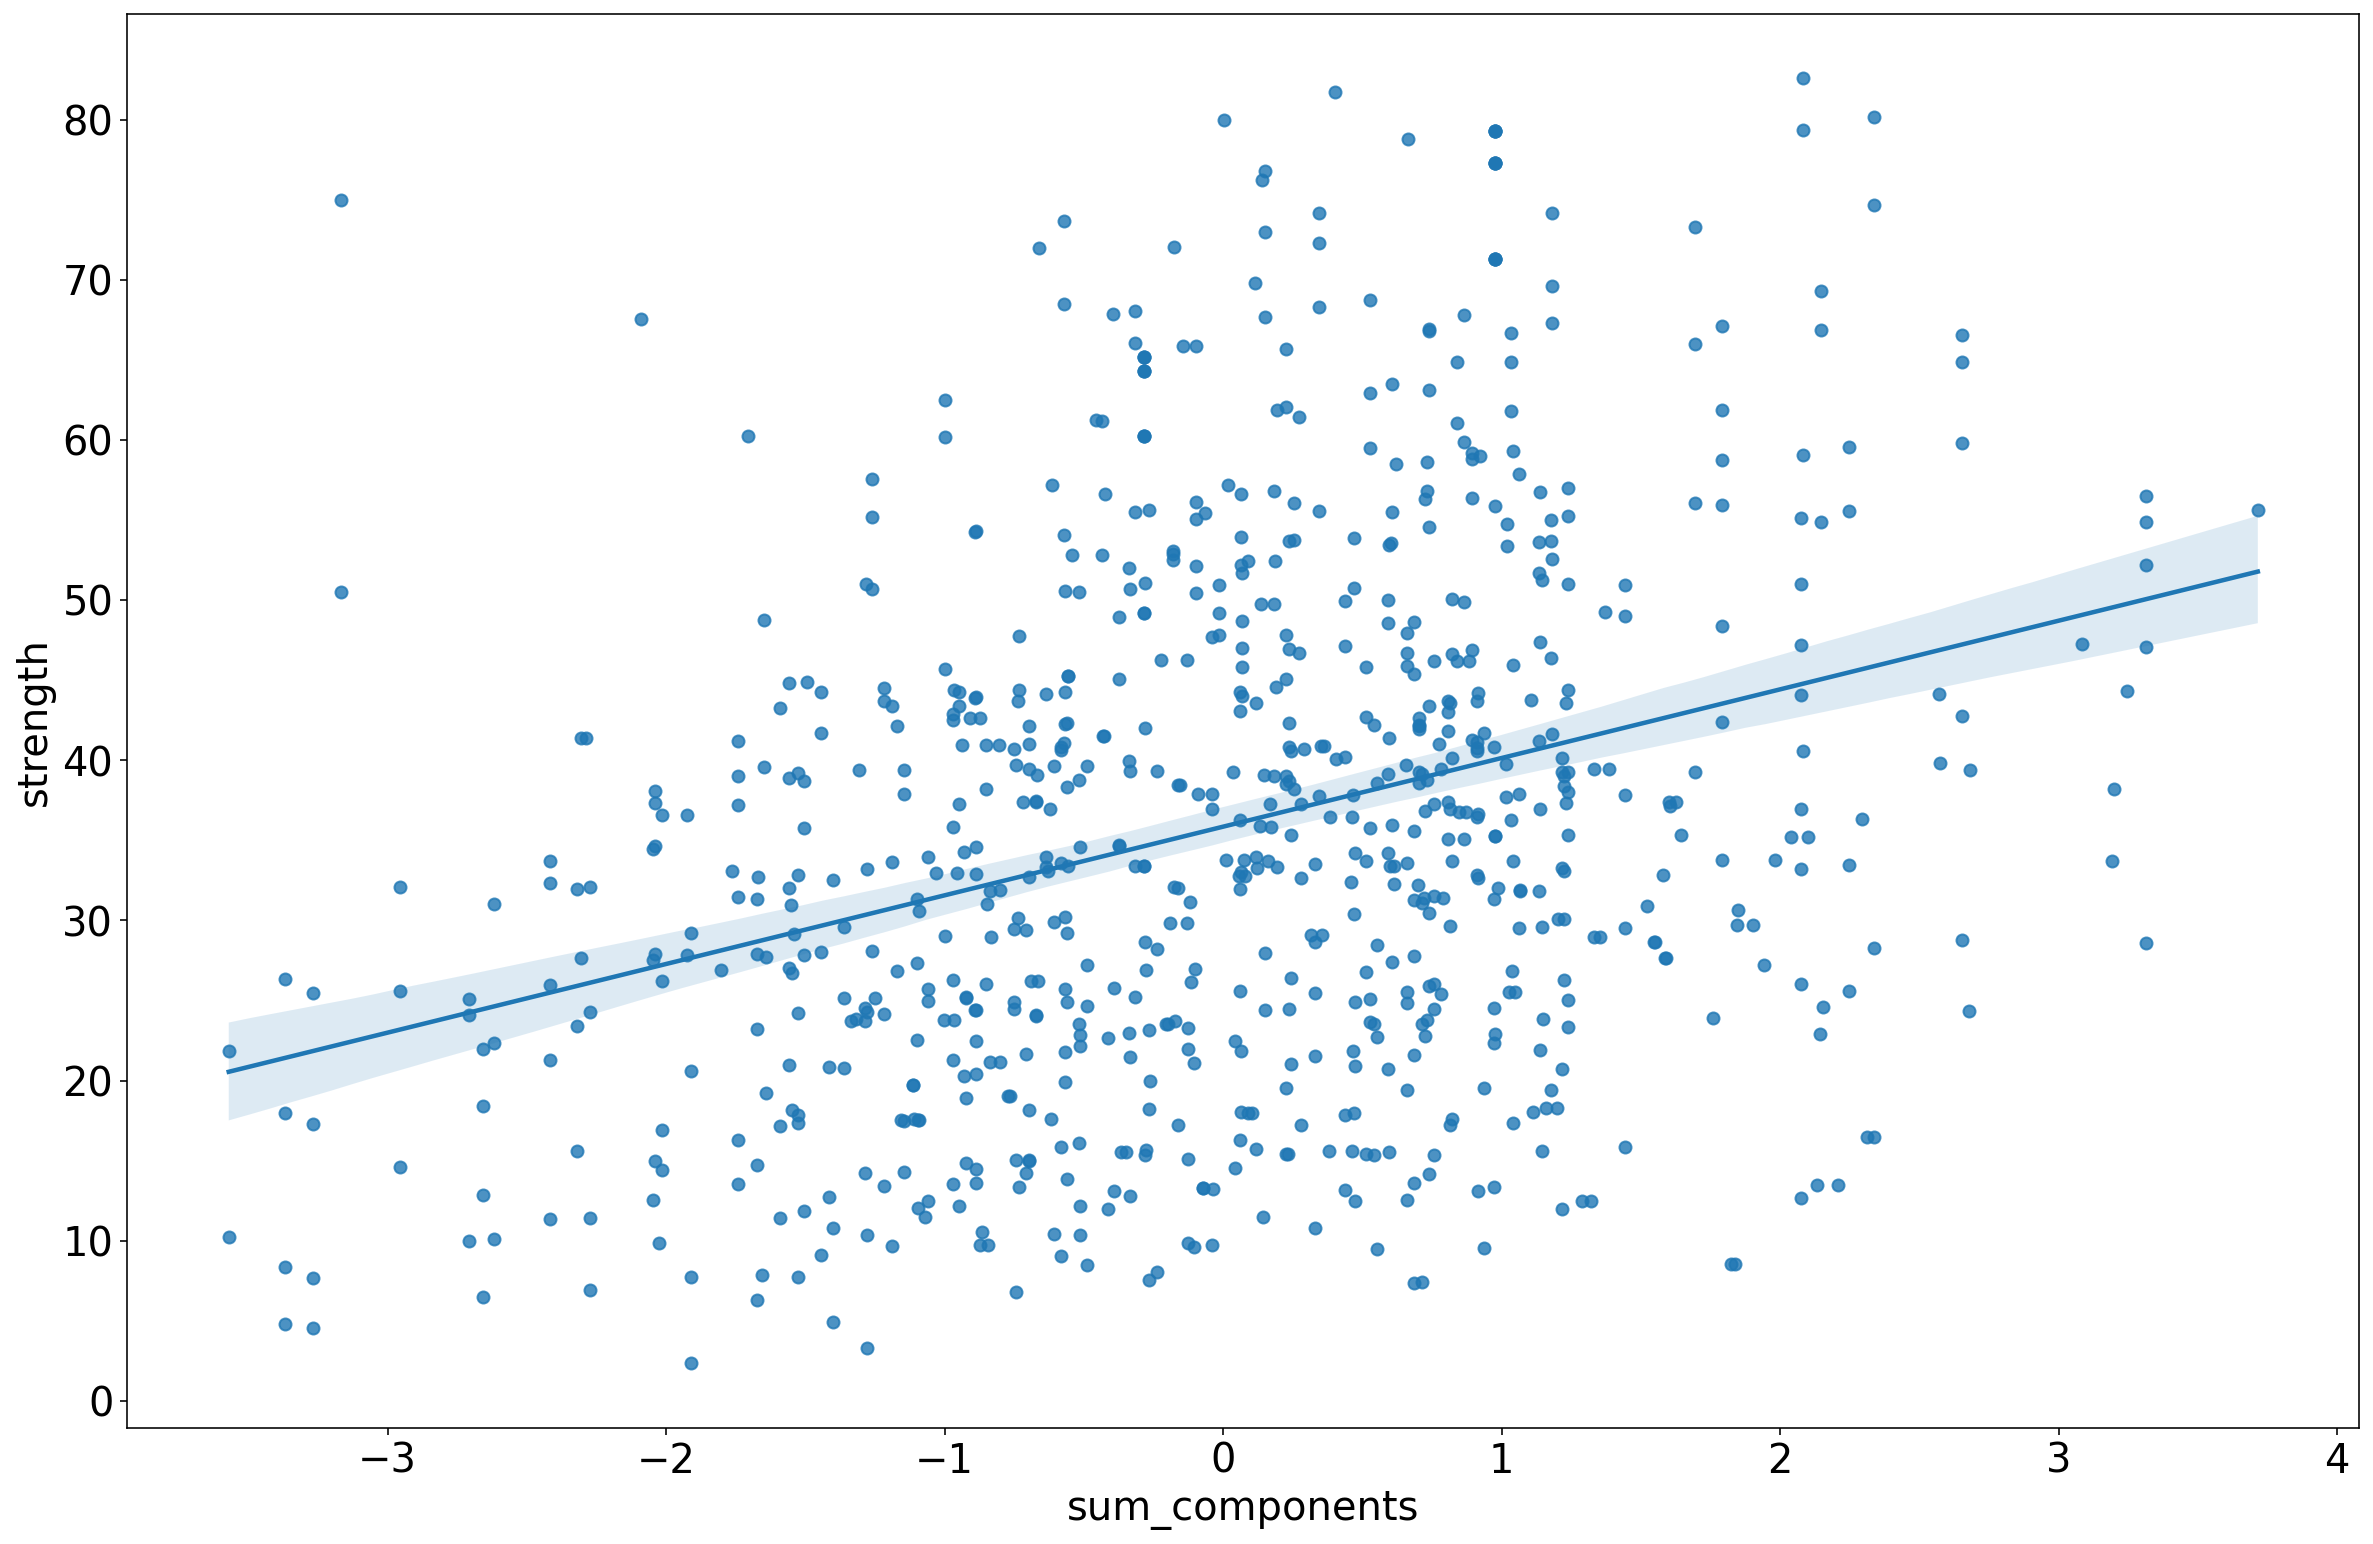

In [26]:
sns.regplot(data=df_stnd, x="sum_components", y="strength");

### Model with rescaled data

Let's now train a $kNN$ with rescaled data and compare the three scores with the baseline ones.

#### Normalised data and no addition

In [27]:
model_norm = KNeighborsRegressor(metric='manhattan')
model_norm.fit(X_train_norm, y_train);

In [28]:
print(f"The model mean absolute error: {mean_absolute_error(y_test, model_norm.predict(X_test_norm)):.2f}")

print(f"The model mean squared error: {mean_squared_error(y_test, model_norm.predict(X_test_norm)):.2f}")

The model mean absolute error: 7.27
The model mean squared error: 84.89


#### Normalised data and composed feature

Here we study the normalised data with composite feature.

In [29]:
normaliser = MinMaxScaler()
standardiser = StandardScaler()

X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_norm = normaliser.fit_transform(X_train)
X_train_stnd = standardiser.fit_transform(X_train)

X_test_norm = normaliser.transform(X_test)
X_test_stnd = standardiser.transform(X_test)

In [30]:
model_norm = KNeighborsRegressor(metric='manhattan')
model_norm.fit(X_train_norm, y_train);

In [31]:
print(f"The model mean absolute error: {mean_absolute_error(y_test, model_norm.predict(X_test_norm)):.2f}")

print(f"The model mean squared error: {mean_squared_error(y_test, model_norm.predict(X_test_norm)):.2f}")

The model mean absolute error: 7.78
The model mean squared error: 102.80


#### Normalised data and reduced features

Let's try to use just the concrete feature, the age and the sum of the other features. 

In [32]:
model_norm = KNeighborsRegressor(metric='manhattan')
model_norm.fit(X_train_norm[:, [0, -2, -1]], y_train);

In [33]:
print(f"The model mean absolute error: {mean_absolute_error(y_test, model_norm.predict(X_test_norm[:, [0, -2, -1]])):.2f}")

print(f"The model mean squared error: {mean_squared_error(y_test, model_norm.predict(X_test_norm[:, [0, -2, -1]])):.2f}")

The model mean absolute error: 6.99
The model mean squared error: 86.47


### Grid Search of Hyperparameters

Finally let's fix the number of neighbours with a grid search cross validation.

In [34]:
model = KNeighborsRegressor()
# Set parameters space as a dictionary
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range, metric=["euclidean", "manhattan", "chebyshev"])

In [35]:
# Define parameter range
grid = GridSearchCV(model, param_grid, cv=10, scoring='neg_mean_absolute_error', return_train_score=True, verbose=1) 

In [36]:
# Fit the model for grid search
grid_search=grid.fit(X_train_stnd, y_train);

Fitting 10 folds for each of 90 candidates, totalling 900 fits


In [37]:
print(grid_search.best_params_)

{'metric': 'euclidean', 'n_neighbors': 3}


In [38]:
print(grid_search.best_score_)

-6.828168004115227


In [39]:
print(grid_search.best_estimator_.score(X_test, y_test))

0.024822774771666722


In [40]:
best_model = grid_search.best_estimator_

In [41]:
print(mean_squared_error(y_test,best_model.predict(X_test_stnd)))

73.17285317855168
